# Surprise-Housing-Australia:
### Probem statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
The company wants to know:
- 
Which variables are significant in predicting the price of a house, a .<br>d- 

How well those variables describe the price of a house.
 
### Business Goal:
Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectatiomodel the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
ns.

### Steps:
  (1) Data loading.<br>
  (2) Data cleaning.<br>
  (3) Data analysis and manipulations.<br>
  (4) Data split in Train,test.<br>
  (5) Scaling train data.<br>
  (6) Feature selection<br>
  (7) Model trai using regularizationning.<br>
  (8) Analyzmodel parameters and alphaters.<br>
  (9) Analizing assumptions.<br>
  (10) Scaling test dataset.<br>
  (11) Prediction on test set.<br>
  (12) Analyzing predictions.<br>

In [1]:
# Importing nessasary python libraries
# importing basic libraries for data reading and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Importing libraries for model devolopment
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data loading:

In [2]:
df_housing = pd.read_csv("train.csv")
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_housing.shape

(1460, 81)

As per input data, we can observe the following points:
 - There are 1460 entries or data points from input provided
 - Data has 81 inital columns including independent and dependent target variable 'SalePrice'.

## Univariate analysis and Data cleaning:

As per observation from initial data there are several none(NA) values present in data. But as per data dictionary NA referes to catagory for some variables. 

In [6]:
# Function to create dummy variables from column to reduce code length
def make_dummys(df, column_name, drop_column=None):
    if drop_column is None:
        df_dummys = pd.get_dummies(df[column_name],drop_first = True)
    else:
        df_dummys = pd.get_dummies(df[column_name]).drop(drop_column, axis=1)
    df_dummys = df_dummys.astype(int)
    df = pd.concat([df, df_dummys], axis = 1)
    # now drop input column name column from data
    df = df.drop(column_name, axis=1)
    return df

### Univariate analysis on continuous variables:

In [7]:
#Function to plot continuous variables
def plot_continuous_var(df, column=None, target=None, hue=None ):
    print("Null values in "+column+" :" ,df[column].isna().sum())
    print("Correlation between "+column+","+target +"is: ", df[column].corr(df[target]))
    fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3]}, figsize=(10,5))
    plt.subplots_adjust(wspace=0.3)
    plt.subplot(1, 2, 1)
    sns.boxplot(y = column ,data = df)
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df, x=column, y=target, hue=hue)
    plt.show()

#### Id:
As per data in column Id is property identification number/serial number so we can remove this column from analysis.

In [8]:
df_housing = df_housing.drop('Id', axis=1)

#### SalePrice:
Target variable

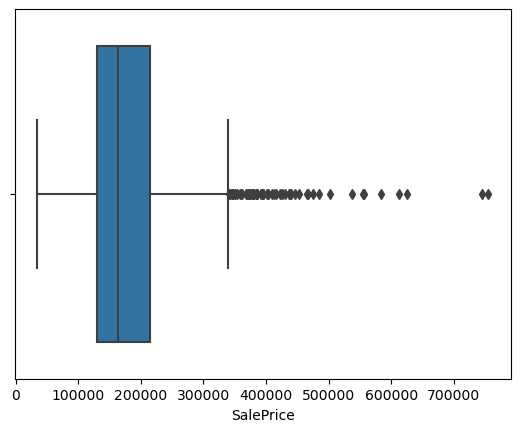

In [9]:
sns.boxplot(x = 'SalePrice' ,data = df_housing)
plt.show()

#### LotFrontage:
Numerical variable.
Linear feet of street connected to property. This columns contains null values.

Null values in LotFrontage : 259
Correlation between LotFrontage,SalePriceis:  0.35179909657067804


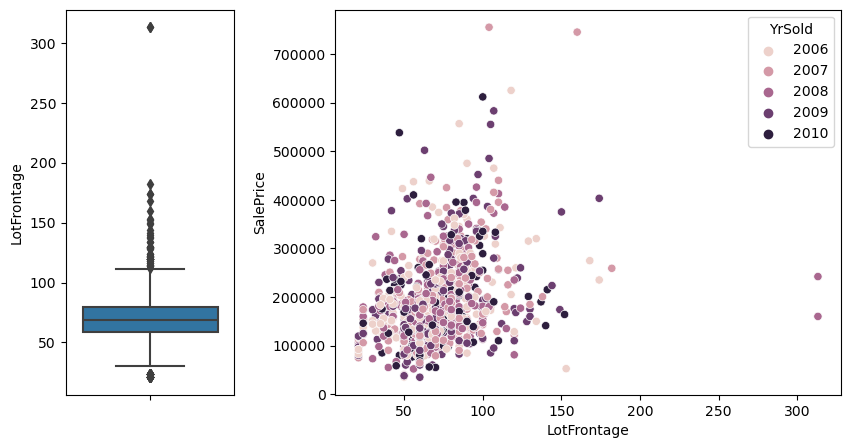

In [10]:
plot_continuous_var(df_housing , column='LotFrontage', target='SalePrice', hue = 'YrSold')

In [11]:
# Imputing null values with median value
df_housing.LotFrontage = df_housing.LotFrontage.fillna(df_housing.LotFrontage.median())
print(len(df_housing[df_housing.LotFrontage > 125]))
# Droping outlier rows with LotFrontage more then 125
df_housing =  df_housing[df_housing.LotFrontage < 125]
df_housing.shape

24


(1436, 80)

#### LotArea:
Lot size in square feet

Null values in LotArea : 0
Correlation between LotArea,SalePriceis:  0.2762958178328449


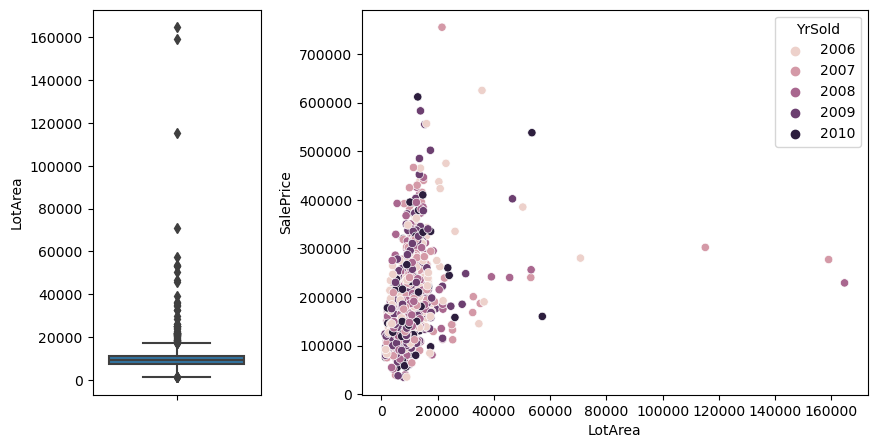

In [12]:
plot_continuous_var(df_housing , column='LotArea', target='SalePrice', hue = 'YrSold')

In [13]:
print(len(df_housing[df_housing.LotArea > 20000]))
# Droping outlier rows with LotArea more then 20000 sq feet
df_housing =  df_housing[df_housing.LotArea < 20000]
df_housing.shape

45


(1391, 80)

#### MasVnrArea: 
Masonry veneer area in square feet

Null values in MasVnrArea : 7
Correlation between MasVnrArea,SalePriceis:  0.46757559696249773


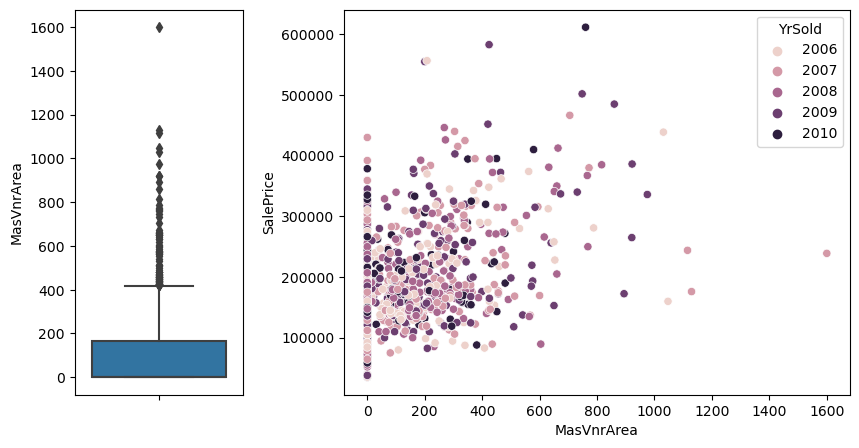

In [14]:
plot_continuous_var(df_housing , column='MasVnrArea', target='SalePrice', hue = 'YrSold')

In [15]:
# Removing rows where null values present
df_housing = df_housing[~df_housing.MasVnrArea.isna()]
# Removing outliers which value more then 750
df_housing = df_housing[df_housing.MasVnrArea < 750]
df_housing.shape

(1368, 80)

#### BsmtFinSF1: 
Type 1 finished square feet

Null values in BsmtFinSF1 : 0
Correlation between BsmtFinSF1,SalePriceis:  0.37579200965696974


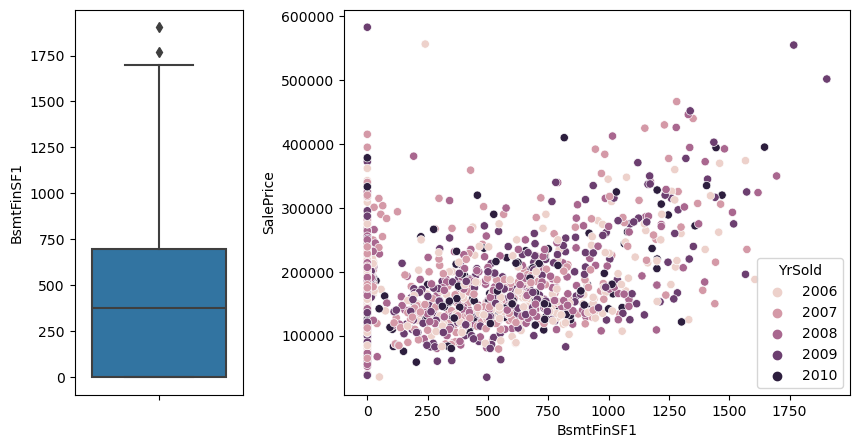

In [16]:
plot_continuous_var(df_housing , column='BsmtFinSF1', target='SalePrice', hue = 'YrSold')

In [17]:
# Removing outliers which value more then 750
df_housing = df_housing[df_housing.BsmtFinSF1 < 1750]
print("Shape of the data:", df_housing.shape)

Shape of the data: (1366, 80)


#### BsmtFinSF2:
Type 2 finished square feet

Null values in BsmtFinSF2 : 0
Correlation between BsmtFinSF2,SalePriceis:  -0.02462697992116135


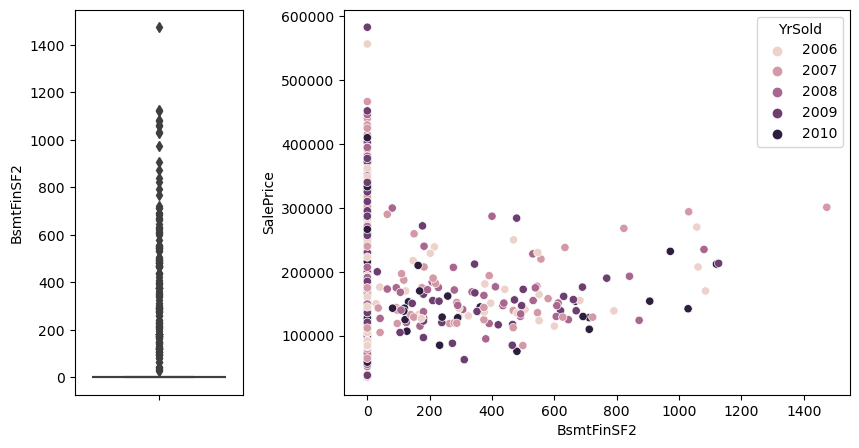

In [18]:
plot_continuous_var(df_housing , column='BsmtFinSF2', target='SalePrice', hue = 'YrSold')

From the above observation most of the values in 'BsmtFinSF2' column values are 0. So we can ignore this variable from our analysis

In [19]:
df_housing = df_housing.drop('BsmtFinSF2', axis=1)
df_housing.shape

(1366, 79)

#### BsmtUnfSF: 
Unfinished square feet of basement area

Null values in BsmtUnfSF : 0
Correlation between BsmtUnfSF,SalePriceis:  0.24072053003354005


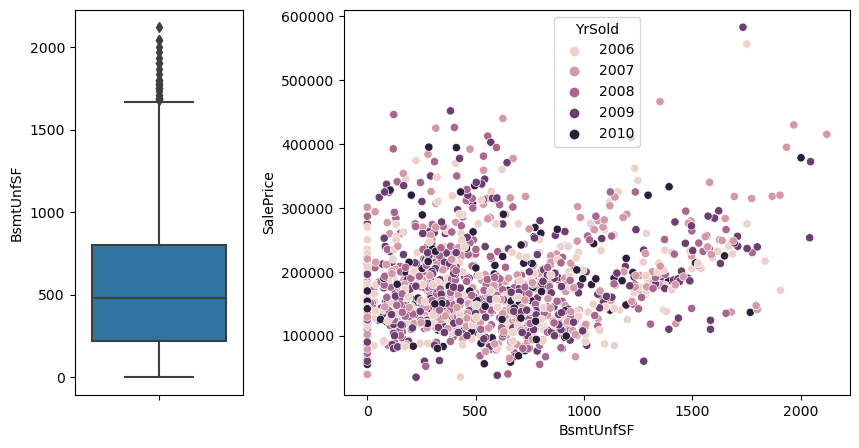

In [20]:
plot_continuous_var(df_housing , column='BsmtUnfSF', target='SalePrice', hue = 'YrSold')

#### TotalBsmtSF: 
Total square feet of basement area

Null values in TotalBsmtSF : 0
Correlation between TotalBsmtSF,SalePriceis:  0.6286771769648969


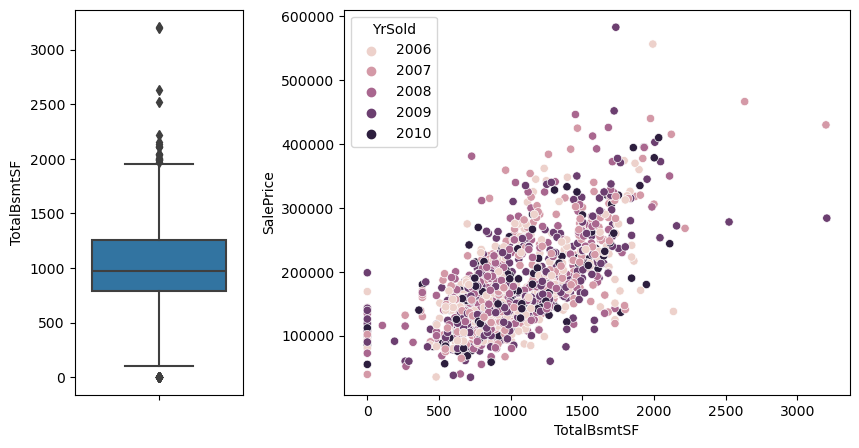

In [21]:
plot_continuous_var(df_housing , column='TotalBsmtSF', target='SalePrice', hue = 'YrSold')

In [22]:
# Removing outliers which value more then 2400
df_housing = df_housing[df_housing.TotalBsmtSF < 2400]
print("Shape of the data:", df_housing.shape)

Shape of the data: (1362, 79)


#### 1stFlrSF:
First Floor square feet

Null values in 1stFlrSF : 0
Correlation between 1stFlrSF,SalePriceis:  0.6011169459527455


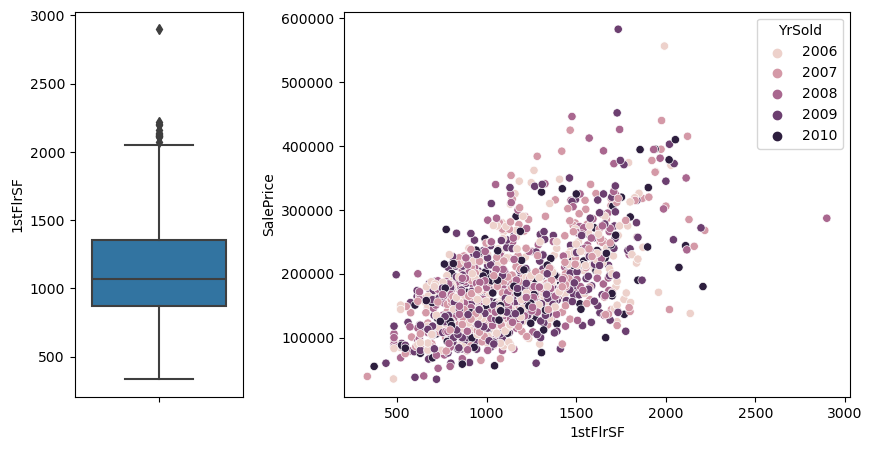

In [23]:
plot_continuous_var(df_housing , column='1stFlrSF', target='SalePrice', hue = 'YrSold')

In [24]:
# Removing outliers which value more then 2500
df_housing = df_housing[df_housing['1stFlrSF'] < 2500]
print("Shape of the data:", df_housing.shape)

Shape of the data: (1361, 79)


#### 2ndFlrSF: 
Second floor square feet

Null values in 2ndFlrSF : 0
Correlation between 2ndFlrSF,SalePriceis:  0.30201680209903004


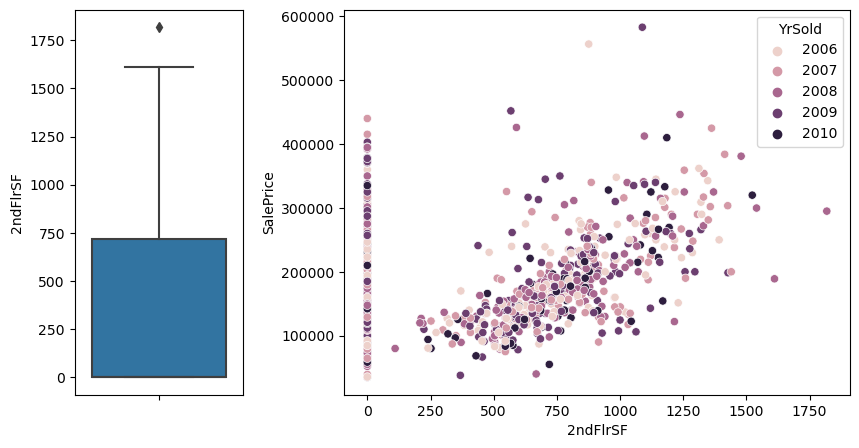

In [25]:
plot_continuous_var(df_housing , column='2ndFlrSF', target='SalePrice', hue = 'YrSold')

In [26]:
# Removing outliers which value more then 1750
df_housing = df_housing[df_housing['2ndFlrSF'] < 1750]
print("Shape of the data:", df_housing.shape)

Shape of the data: (1360, 79)


#### LowQualFinSF: 
Low quality finished square feet (all floors)

Null values in LowQualFinSF : 0
Correlation between LowQualFinSF,SalePriceis:  -0.06987058579228769


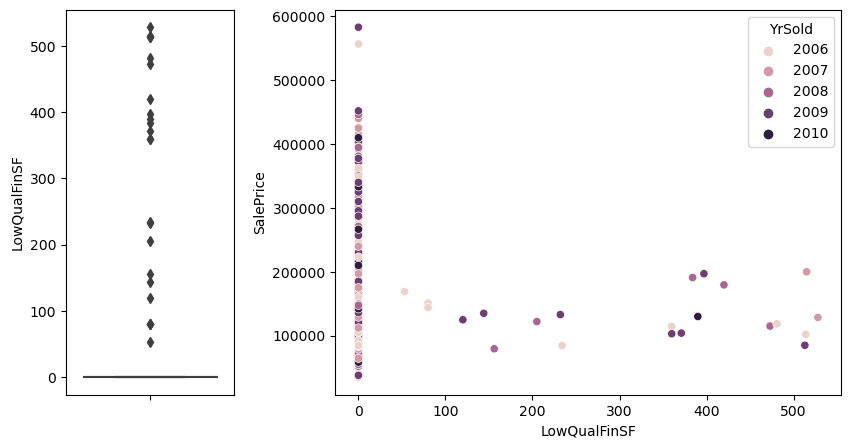

In [27]:
plot_continuous_var(df_housing , column='LowQualFinSF', target='SalePrice', hue = 'YrSold')

In [28]:
# Drop the column from analysis because most of the LowQualFinSF column values are 0
df_housing = df_housing.drop('LowQualFinSF', axis=1)
df_housing.shape

(1360, 78)

#### GrLivArea: 
Above grade (ground) living area square feet

Null values in GrLivArea : 0
Correlation between GrLivArea,SalePriceis:  0.7002819185322293


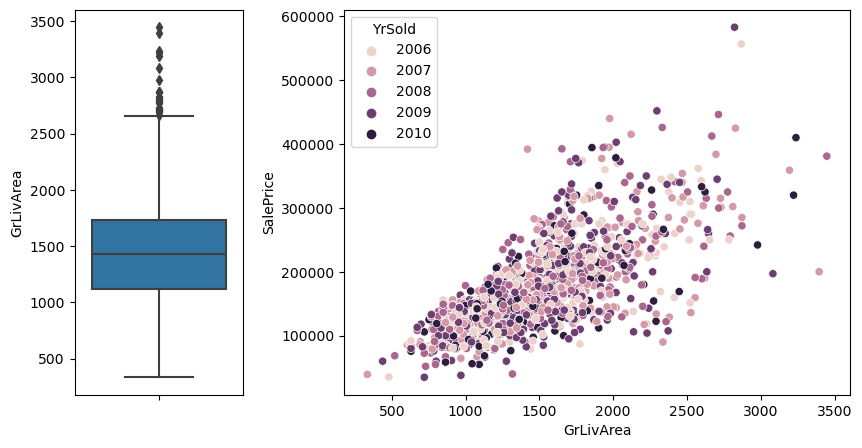

In [29]:
plot_continuous_var(df_housing , column='GrLivArea', target='SalePrice', hue = 'YrSold')

In [30]:
# Removing outliers which value more then 2750
df_housing = df_housing[df_housing['GrLivArea'] < 2750]
print("Shape of the data:", df_housing.shape)

Shape of the data: (1344, 78)


#### GarageArea: 
Size of garage in square feet

Null values in GarageArea : 0
Correlation between GarageArea,SalePriceis:  0.637923244339756


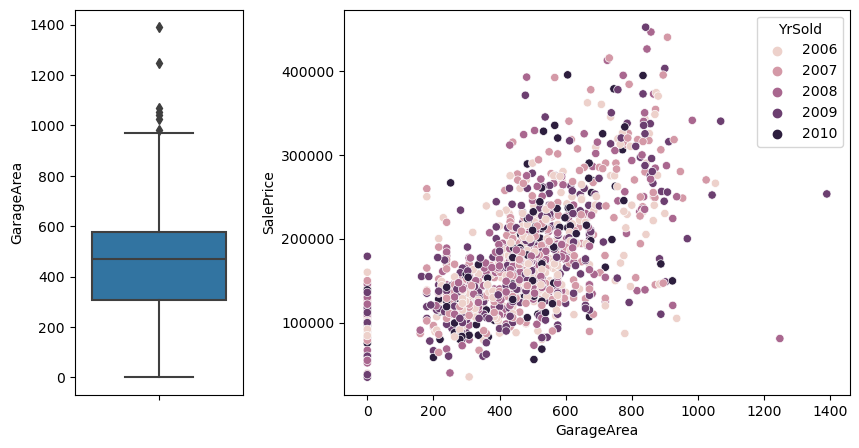

In [31]:
plot_continuous_var(df_housing , column='GarageArea', target='SalePrice', hue = 'YrSold')

In [32]:
# Removing outliers which value more then 2750
df_housing = df_housing[df_housing['GarageArea'] < 1200]
print("Shape of the data:", df_housing.shape)

Shape of the data: (1342, 78)


#### WoodDeckSF:
Wood deck area in square feet

Null values in WoodDeckSF : 0
Correlation between WoodDeckSF,SalePriceis:  0.3128040224589446


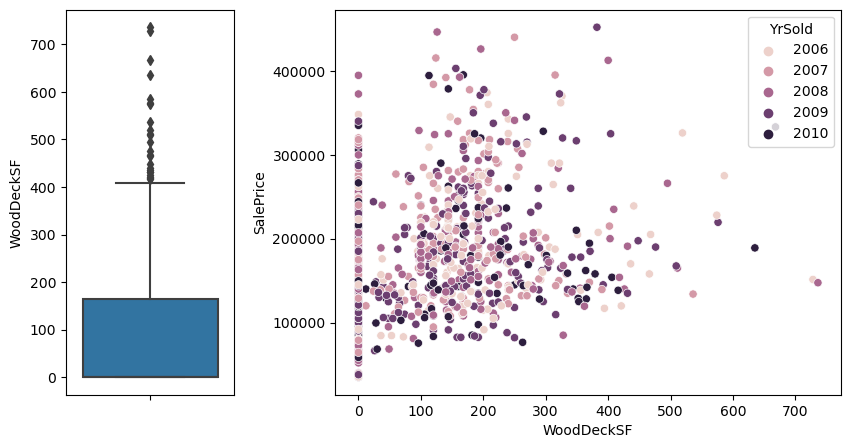

In [33]:
plot_continuous_var(df_housing , column='WoodDeckSF', target='SalePrice', hue = 'YrSold')

In [34]:
# Removing outliers which value more then 550
df_housing = df_housing[df_housing['WoodDeckSF'] < 550]
print("Shape of the data:", df_housing.shape)

Shape of the data: (1335, 78)


#### OpenPorchSF: 
Open porch area in square feet

Null values in OpenPorchSF : 0
Correlation between OpenPorchSF,SalePriceis:  0.334745998671128


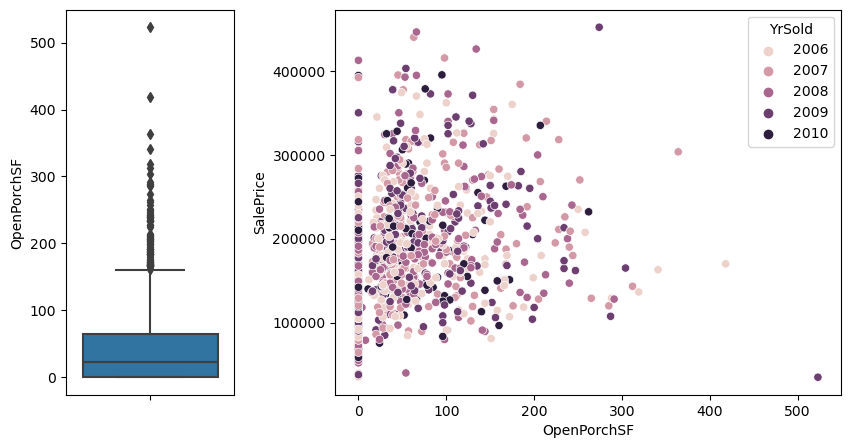

In [35]:
plot_continuous_var(df_housing , column='OpenPorchSF', target='SalePrice', hue = 'YrSold')

In [36]:
# Removing outliers which value more then 300
df_housing = df_housing[df_housing['OpenPorchSF'] < 300]
print("Shape of the data:", df_housing.shape)

Shape of the data: (1328, 78)


#### EnclosedPorch: 
Enclosed porch area in square feet

Null values in EnclosedPorch : 0
Correlation between EnclosedPorch,SalePriceis:  -0.15654613285641159


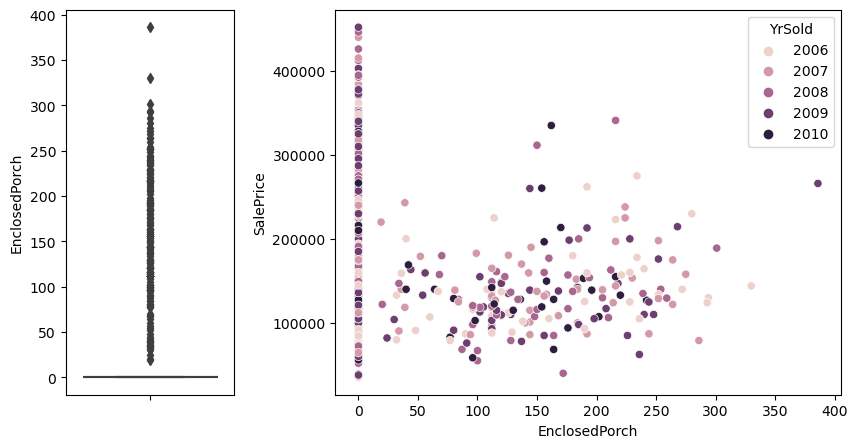

In [37]:
plot_continuous_var(df_housing , column='EnclosedPorch', target='SalePrice', hue = 'YrSold')

In [38]:
# Drop the column from analysis because most of the LowQualFinSF column values are 0
df_housing = df_housing.drop('EnclosedPorch', axis=1)
df_housing.shape

(1328, 77)

#### 3SsnPorch: 
Three season porch area in square feet

Null values in 3SsnPorch : 0
Correlation between 3SsnPorch,SalePriceis:  0.055387407274240144


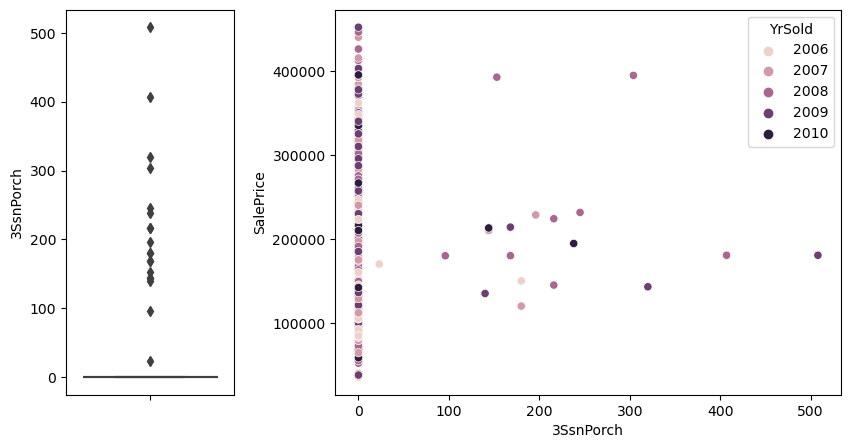

In [39]:
plot_continuous_var(df_housing , column='3SsnPorch', target='SalePrice', hue = 'YrSold')

In [40]:
# Drop the column from analysis because most of the LowQualFinSF column values are 0
df_housing = df_housing.drop('3SsnPorch', axis=1)
df_housing.shape

(1328, 76)

#### ScreenPorch: 
Screen porch area in square feet

Null values in ScreenPorch : 0
Correlation between ScreenPorch,SalePriceis:  0.09314894588596631


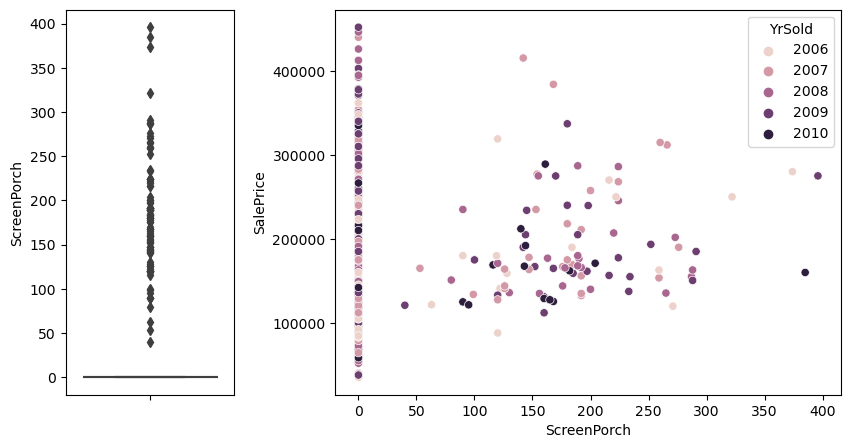

In [41]:
plot_continuous_var(df_housing , column='ScreenPorch', target='SalePrice', hue = 'YrSold')

In [42]:
# Drop the column from analysis because most of the LowQualFinSF column values are 0
df_housing = df_housing.drop('ScreenPorch', axis=1)
df_housing.shape

(1328, 75)

#### PoolArea: 
Pool area in square feet

Null values in PoolArea : 0
Correlation between PoolArea,SalePriceis:  0.0024560988715618183


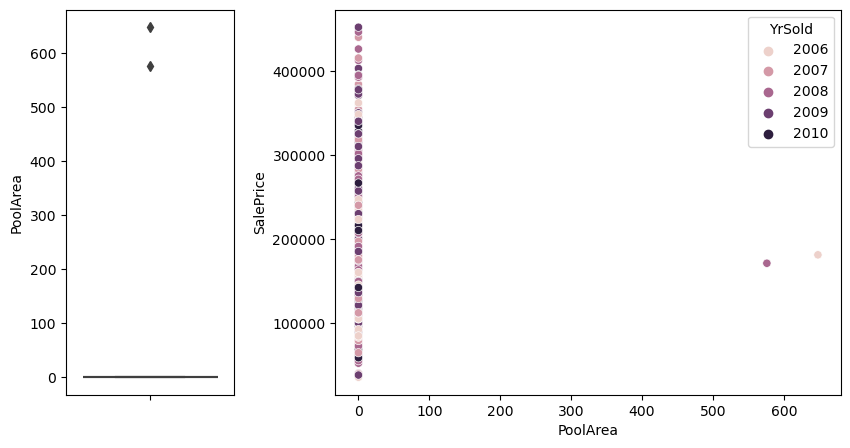

In [43]:
plot_continuous_var(df_housing , column='PoolArea', target='SalePrice', hue = 'YrSold')

In [44]:
# Drop the column from analysis because most of the LowQualFinSF column values are 0
df_housing = df_housing.drop('PoolArea', axis=1)
df_housing.shape

(1328, 74)

#### MiscVal: 
$Value of miscellaneous feature


Null values in MiscVal : 0
Correlation between MiscVal,SalePriceis:  -0.02122804008344018


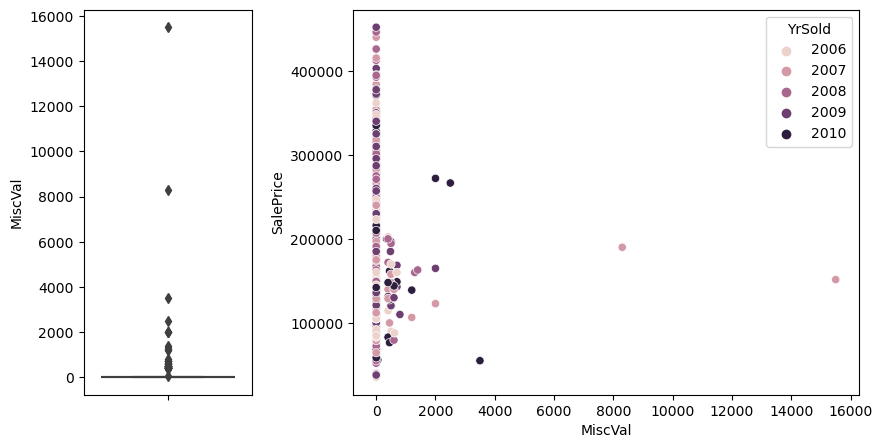

In [45]:
plot_continuous_var(df_housing , column='MiscVal', target='SalePrice', hue = 'YrSold')

In [46]:
# Drop the column from analysis because most of the LowQualFinSF column values are 0
df_housing = df_housing.drop('MiscVal', axis=1)
df_housing.shape

(1328, 73)

### Univariate analysis on continuous catagorical variables:

In [47]:
def plot_concat_var(df, column_name=None, target=None, hue=None , plot_type='Box'):
    print("Null values in "+column_name+" :" ,df[column_name].isna().sum())    
    if plot_type == 'Box':
        sns.catplot(data=df, x=column_name, y=target, kind="box")
        plt.xticks(rotation=90)
        plt.show()
    elif plot_type == 'Bar':
        pt = pd.pivot_table(df, values=target, index=column_name, columns=hue, aggfunc='mean')
        pt.plot(kind='bar', rot=90,  ylabel=target, title=target+" Vs "+column_name)
        plt.legend( bbox_to_anchor=(1.25, 1.0),loc='upper right')
        
#Function to plot continuous variables
def plot_scatter(df, column=None, target=None, hue=None ):
    print("Correlation between "+column+","+target +"is: ", df[column].corr(df[target]))
    sns.scatterplot(data=df, x=column, y=target, hue=hue)
    plt.show()

#### Fence: 
Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

Null values in Fence : 0


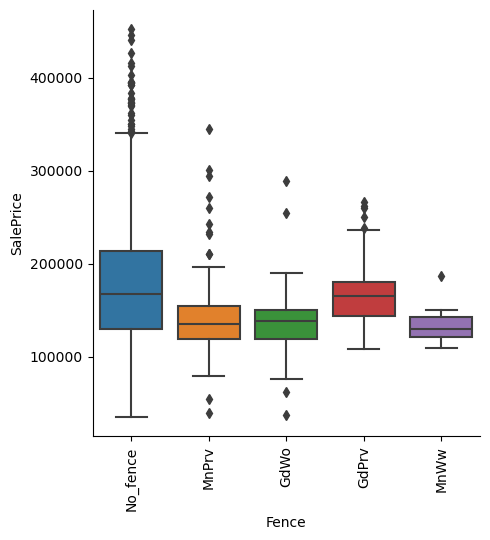

In [48]:
df_housing.Fence = df_housing.Fence.fillna('No_fence')
plot_concat_var(df_housing, column_name='Fence', target='SalePrice' )#,hue='YrSold'

In [49]:
# Map Fence values to ordered integers as follows
df_housing.Fence = df_housing.Fence.map({'GdPrv':4, 
                                         'MnPrv':3,
                                         'GdWo':2,
                                         'MnWw':1,
                                         'No_fence':0
                                        })
df_housing.Fence = df_housing.Fence.astype(int)

#### PoolQC: 
Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Null values in PoolQC : 0


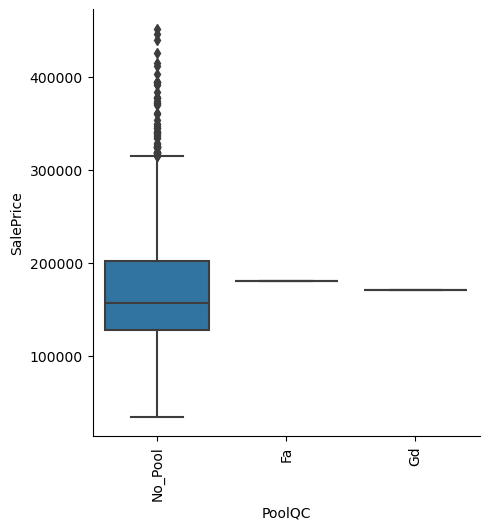

In [50]:
df_housing.PoolQC = df_housing.PoolQC.fillna('No_Pool')
plot_concat_var(df_housing, column_name='PoolQC', target='SalePrice' )#,hue='YrSold'

There are not much values present in Fa, Gd catagory so we can drop this column.

In [51]:
df_housing = df_housing.drop('PoolQC', axis=1)

#### Alley: 
Type of alley access to property
- Grvl	&emsp;Gravel
- Pave	&emsp;Paved
- NA 	&emsp;No alley access

This column contain null values which represents No Alley access to property.
we can make dummy variables from this column by mapping variable names as follows.

Null values in Alley : 0


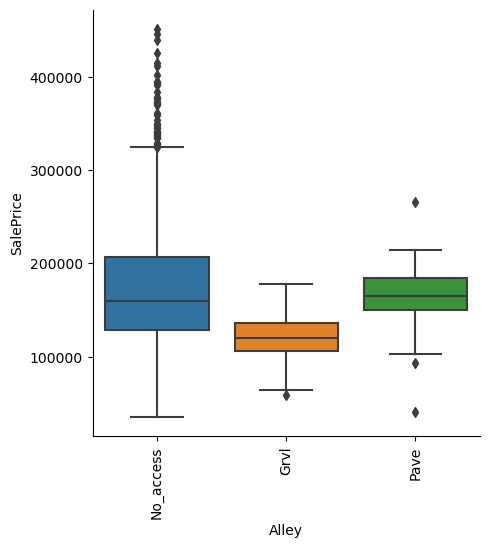

In [52]:
df_housing.Alley = df_housing.Alley.fillna('No_access')
plot_concat_var(df_housing, column_name='Alley', target='SalePrice' )#,hue='YrSold'

In [53]:
# Map Alley values to ordered integers as follows
df_housing.Alley = df_housing.Alley.map({'Pave':2,
                                         'Grvl':1,
                                         'No_access':0
                                        })
df_housing.Alley = df_housing.Alley.astype(int)

#### LotShape:
General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
There are no null values present in this column
We can make dummy variables from this catagorical variable as follows.

Null values in LotShape : 0


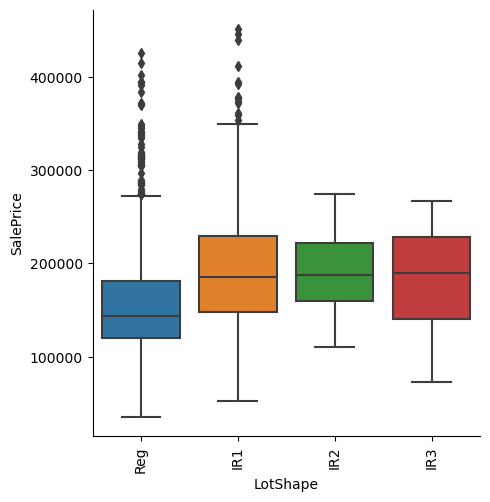

In [54]:
plot_concat_var(df_housing, column_name='LotShape', target='SalePrice' )#,hue='YrSold'

In [55]:
# Map LotShape values to ordered integers as follows
df_housing.LotShape = df_housing.LotShape.map({'Reg':3,
                                         'IR1':2,
                                         'IR2':1,
                                         'IR3':0
                                        })

df_housing.LotShape = df_housing.LotShape.astype(int)

Null values in OverallQual : 0


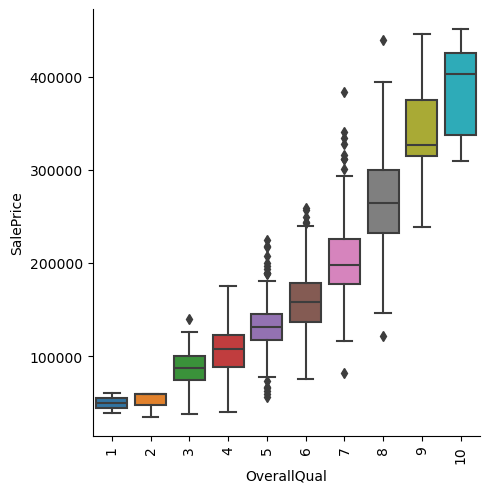

In [56]:
plot_concat_var(df_housing, column_name='OverallQual', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between 'OverallQual' and target variable.

#### OverallCond:
Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

Null values in OverallCond : 0


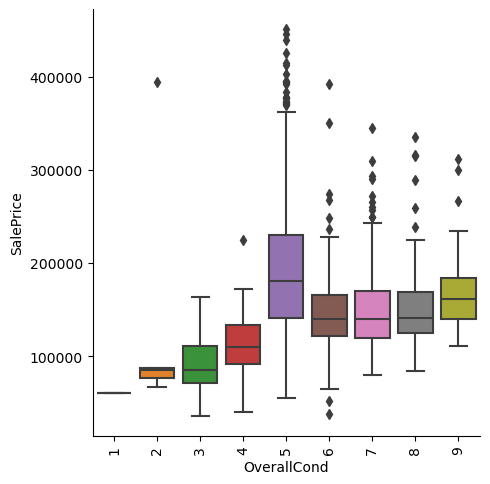

In [57]:
plot_concat_var(df_housing, column_name='OverallCond', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between 'OverallCond' and target variable.

#### YearBuilt: 
Original construction date
We can compute how old the property from current year for analysis, but this information will be extracted from scalling later.

Null values in YearBuilt : 0


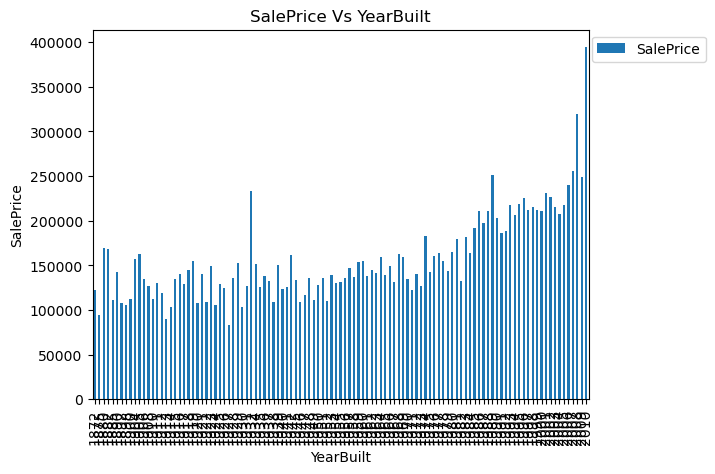

In [58]:
plot_concat_var(df_housing, column_name='YearBuilt', target='SalePrice' , plot_type="Bar")#,hue='YrSold'

From the plot we can observe that there is a clear increase in property price for newly built properties.

#### YearRemodAdd:
Remodel date (same as construction date if no remodeling or additions)

Null values in YearRemodAdd : 0


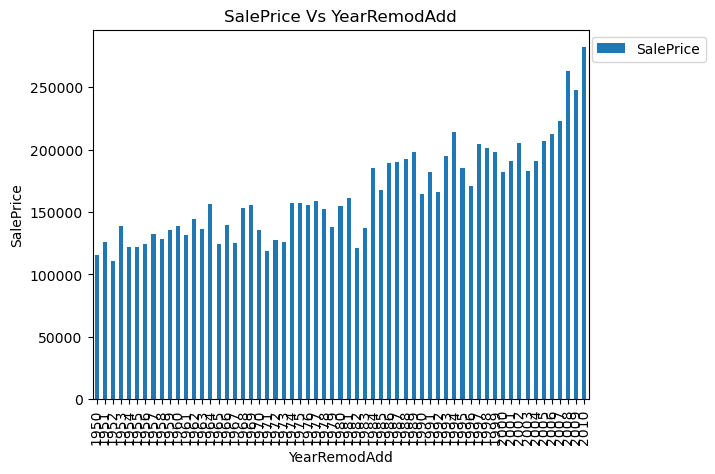

In [59]:
plot_concat_var(df_housing, column_name='YearRemodAdd', target='SalePrice', plot_type='Bar' )#,hue='YrSold'

From the plot we can observe that there is a clear increase in property price for newly remodeled properties.

#### ExterQual: 
Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Null values in ExterQual : 0


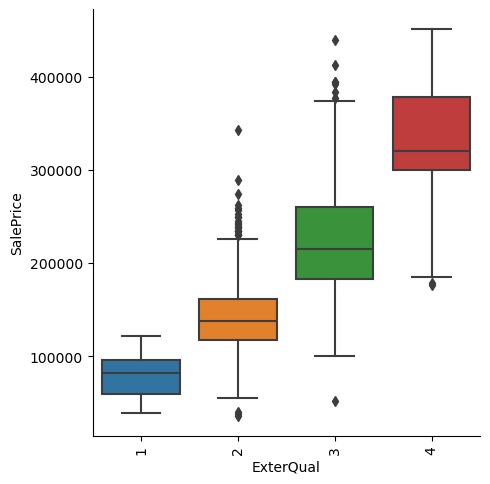

In [60]:
# Map ExterQual values to ordered integers as follows
df_housing.ExterQual = df_housing.ExterQual.map({'Ex':4,
                                                 'Gd':3,
                                                 'TA':2,
                                                 'Fa':1,
                                                 'Po':0
                                                })

df_housing.ExterQual = df_housing.ExterQual.astype(int)
plot_concat_var(df_housing, column_name='ExterQual', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between quality of the material on the exterior  and target variable.

#### ExterCond:
Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Null values in ExterCond : 0


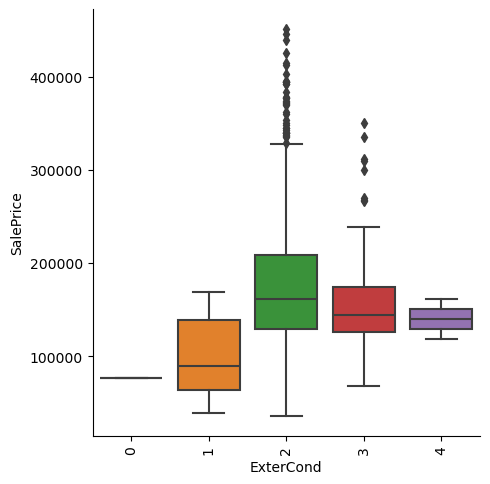

In [61]:
# Map ExterCond values to ordered integers as follows
df_housing.ExterCond = df_housing.ExterCond.map({'Ex':4,
                                                 'Gd':3,
                                                 'TA':2,
                                                 'Fa':1,
                                                 'Po':0
                                                })

df_housing.ExterCond = df_housing.ExterCond.astype(int)
plot_concat_var(df_housing, column_name='ExterCond', target='SalePrice' )#,hue='YrSold'

#### BsmtQual: 
Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

Null values in BsmtQual : 0


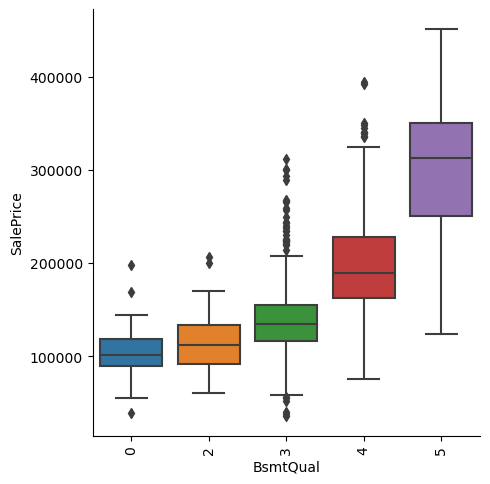

In [62]:
# Map BsmtQual values to ordered integers as follows
df_housing.BsmtQual = df_housing.BsmtQual.fillna('No_basement')
df_housing.BsmtQual = df_housing.BsmtQual.map({'Ex':5,
                                                 'Gd':4,
                                                 'TA':3,
                                                 'Fa':2,
                                                 'Po':1,
                                                 'No_basement':0
                                                })

df_housing.BsmtQual = df_housing.BsmtQual.astype(int)
plot_concat_var(df_housing, column_name='BsmtQual', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between height of the basement and target variable.

#### BsmtCond:
Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

Null values in BsmtCond : 0


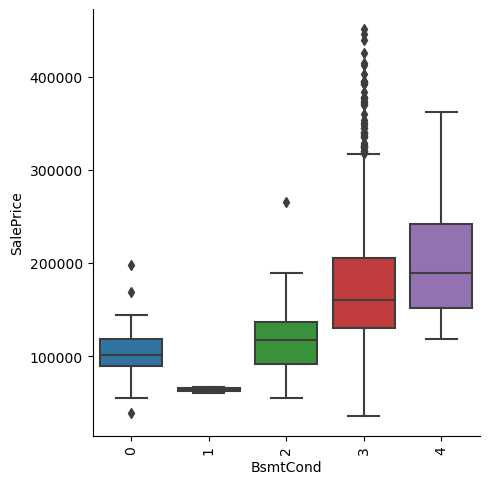

In [63]:
# Map BsmtCond values to ordered integers as follows
df_housing.BsmtCond = df_housing.BsmtCond.fillna('No_basement')
df_housing.BsmtCond = df_housing.BsmtCond.map({'Ex':5,
                                                 'Gd':4,
                                                 'TA':3,
                                                 'Fa':2,
                                                 'Po':1,
                                                 'No_basement':0
                                                })

df_housing.BsmtCond = df_housing.BsmtCond.astype(int)
plot_concat_var(df_housing, column_name='BsmtCond', target='SalePrice' )#,hue='YrSold'

#### BsmtExposure:
Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

Null values in BsmtExposure : 0


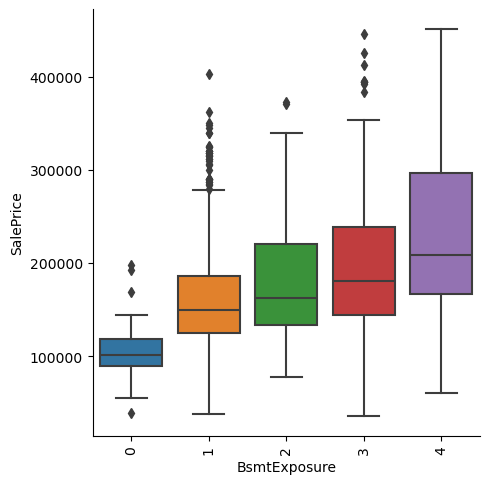

In [64]:
# Map BsmtExposure values to ordered integers as follows
df_housing.BsmtExposure = df_housing.BsmtExposure.fillna('No_basement')
df_housing.BsmtExposure = df_housing.BsmtExposure.map({
                                                 'Gd':4,
                                                 'Av':3,
                                                 'Mn':2,
                                                 'No':1,
                                                 'No_basement':0
                                                })

df_housing.BsmtExposure = df_housing.BsmtExposure.astype(int)
plot_concat_var(df_housing, column_name='BsmtExposure', target='SalePrice' )#,hue='YrSold'

#### BsmtFinType1:
Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Null values in BsmtFinType1 : 0


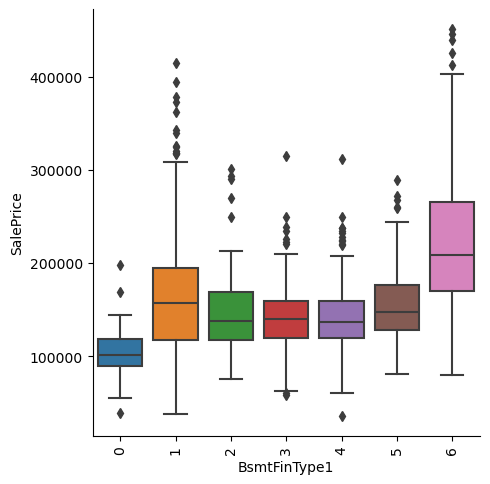

In [65]:
# Map BsmtFinType1 values to ordered integers as follows
df_housing.BsmtFinType1 = df_housing.BsmtFinType1.fillna('No_basement')
df_housing.BsmtFinType1 = df_housing.BsmtFinType1.map({'GLQ':6,
                                                       'ALQ':5,
                                                       'BLQ':4,
                                                       'Rec':3,
                                                       'LwQ':2,
                                                       'Unf':1,
                                                       'No_basement':0
                                                      })

df_housing.BsmtFinType1 = df_housing.BsmtFinType1.astype(int)
plot_concat_var(df_housing, column_name='BsmtFinType1', target='SalePrice' )#,hue='YrSold'

#### BsmtFinType2:
Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Null values in BsmtFinType2 : 0


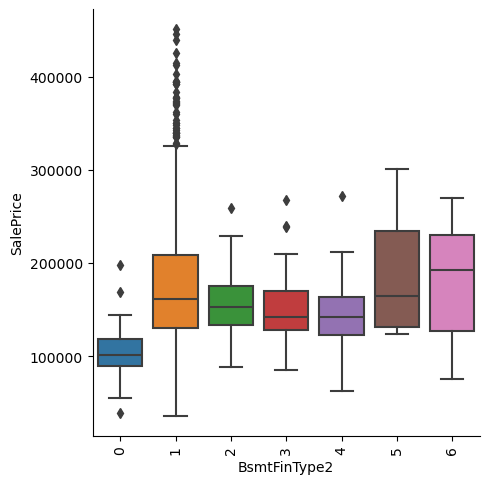

In [66]:
# Map BsmtFinType2 values to ordered integers as follows
df_housing.BsmtFinType2 = df_housing.BsmtFinType2.fillna('No_basement')
df_housing.BsmtFinType2 = df_housing.BsmtFinType2.map({'GLQ':6,
                                                       'ALQ':5,
                                                       'BLQ':4,
                                                       'Rec':3,
                                                       'LwQ':2,
                                                       'Unf':1,
                                                       'No_basement':0
                                                      })

df_housing.BsmtFinType2 = df_housing.BsmtFinType2.astype(int)
plot_concat_var(df_housing, column_name='BsmtFinType2', target='SalePrice' )#,hue='YrSold'

#### HeatingQC: 
Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Null values in HeatingQC : 0


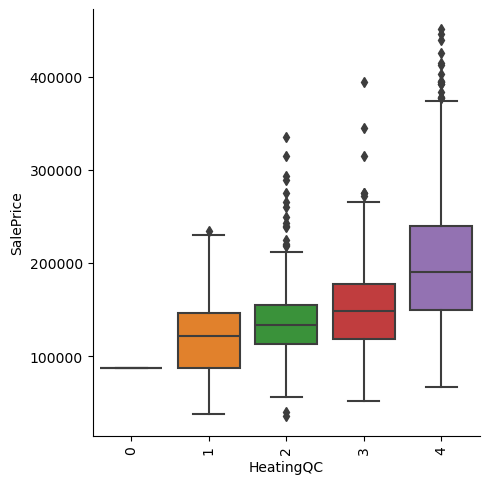

In [67]:
# Map HeatingQC values to ordered integers as follows
df_housing.HeatingQC = df_housing.HeatingQC.map({'Ex':4,
                                                 'Gd':3,
                                                 'TA':2,
                                                 'Fa':1,
                                                 'Po':0
                                                })

df_housing.HeatingQC = df_housing.HeatingQC.astype(int)
plot_concat_var(df_housing, column_name='HeatingQC', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between Heating quality/condition and target variable.

#### BsmtFullBath: 
Basement full bathrooms

Null values in BsmtFullBath : 0


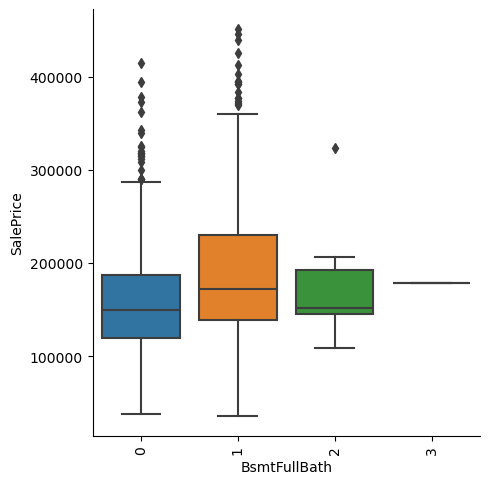

In [68]:
df_housing.BsmtFullBath = df_housing.BsmtFullBath.astype(int)
plot_concat_var(df_housing, column_name='BsmtFullBath', target='SalePrice' )#,hue='YrSold'

#### BsmtHalfBath:
Basement half bathrooms

Null values in BsmtHalfBath : 0


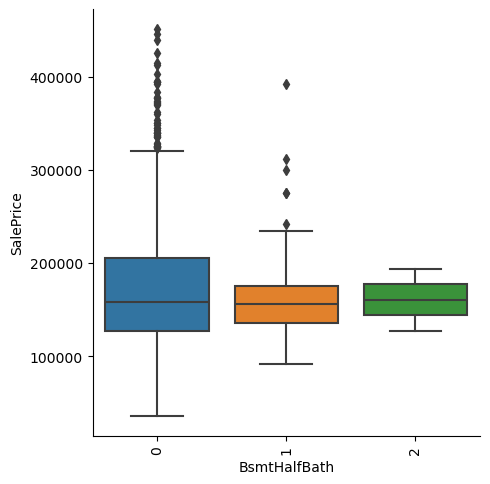

In [69]:
df_housing.BsmtHalfBath = df_housing.BsmtHalfBath.astype(int)
plot_concat_var(df_housing, column_name='BsmtHalfBath', target='SalePrice' )#,hue='YrSold'

#### FullBath: 
Full bathrooms above grade

Null values in FullBath : 0


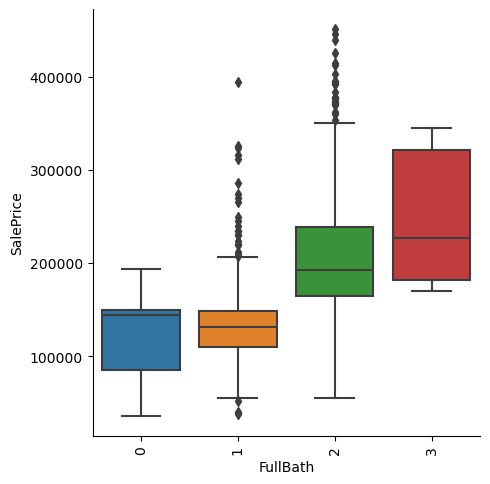

In [70]:
df_housing.FullBath = df_housing.FullBath.astype(int)
plot_concat_var(df_housing, column_name='FullBath', target='SalePrice' )#,hue='YrSold'

#### HalfBath:
Half baths above grade

Null values in HalfBath : 0


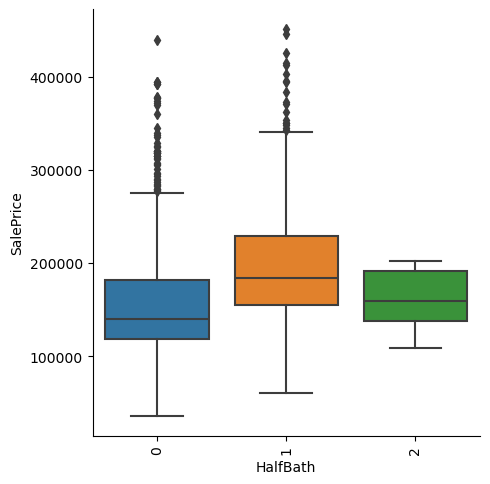

In [71]:
df_housing.HalfBath = df_housing.HalfBath.astype(int)
plot_concat_var(df_housing, column_name='HalfBath', target='SalePrice' )#,hue='YrSold'

#### Bedroom(BedroomAbvGr):
Bedrooms above grade (does NOT include basement bedrooms)
Input dataframe has no column named as 'Bedroom'(in data dictionary) so we are considering 'BedroomAbvGr' for analysis.

Null values in BedroomAbvGr : 0


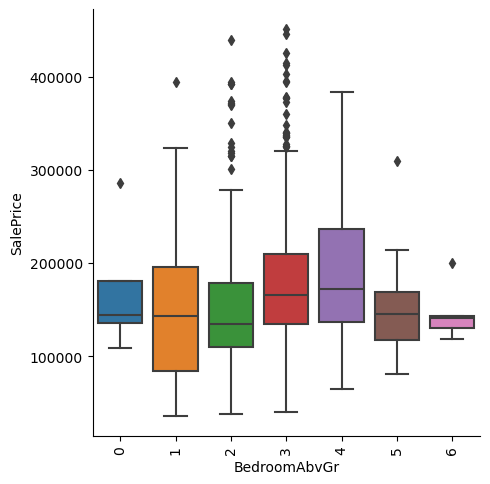

In [72]:
df_housing.BedroomAbvGr = df_housing.BedroomAbvGr.astype(int)
plot_concat_var(df_housing, column_name='BedroomAbvGr', target='SalePrice' )#,hue='YrSold'

#### Kitchen(KitchenAbvGr): 
Kitchens above grade
Input dataframe has no column named as 'Kitchen'(in data dictionary) so we are considering 'KitchenAbvGr' for analysis.

Null values in KitchenAbvGr : 0


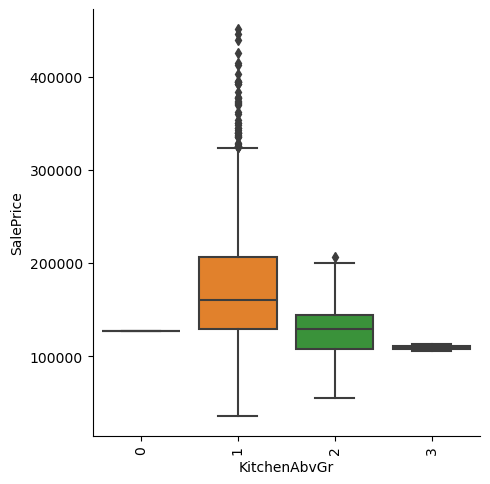

In [73]:
df_housing.KitchenAbvGr = df_housing.KitchenAbvGr.astype(int)
plot_concat_var(df_housing, column_name='KitchenAbvGr', target='SalePrice' )#,hue='YrSold'

#### KitchenQual:
Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

Null values in KitchenQual : 0


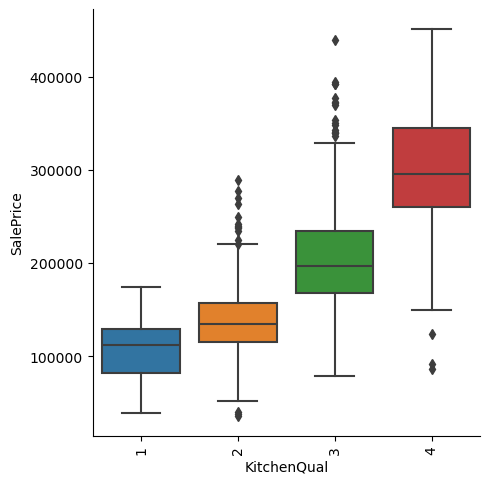

In [74]:
# Map KitchenQual values to ordered integers as follows
df_housing.KitchenQual = df_housing.KitchenQual.map({'Ex':4,
                                                 'Gd':3,
                                                 'TA':2,
                                                 'Fa':1,
                                                 'Po':0
                                                })

df_housing.KitchenQual = df_housing.KitchenQual.astype(int)
plot_concat_var(df_housing, column_name='KitchenQual', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between Kitchen quality and target variable.

#### Functional:
Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Null values in Functional : 0


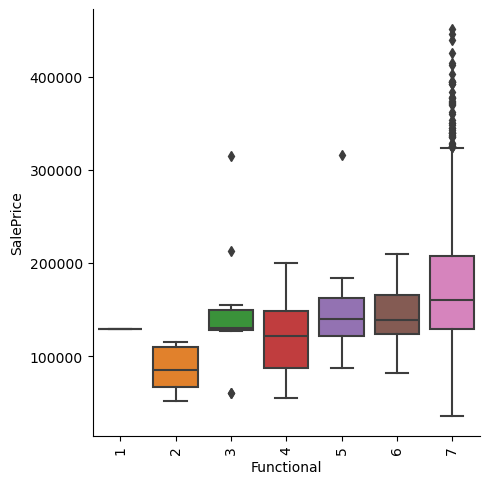

In [75]:
# Map Functional values to ordered integers as follows
df_housing.Functional = df_housing.Functional.map({'Typ':7,
                                                   'Min1':6,
                                                   'Min2':5,
                                                   'Mod':4,
                                                   'Maj1':3,
                                                   'Maj2':2,
                                                   'Sev':1,
                                                   'Sal':0
                                                })

df_housing.Functional = df_housing.Functional.astype(int)
plot_concat_var(df_housing, column_name='Functional', target='SalePrice' )#,hue='YrSold'

#### Fireplaces: 
Number of fireplaces

Null values in Fireplaces : 0


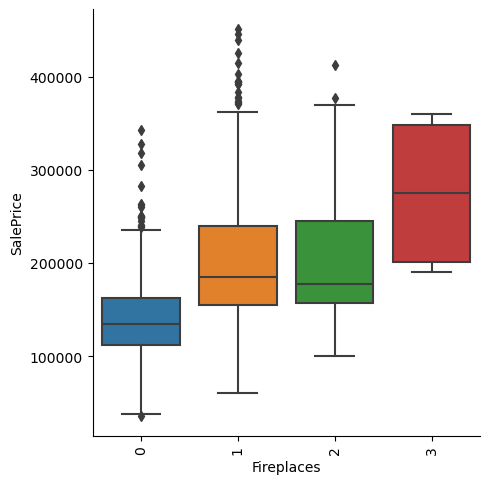

In [76]:
df_housing.Fireplaces = df_housing.Fireplaces.astype(int)
plot_concat_var(df_housing, column_name='Fireplaces', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between Number of fireplaces and target variable.

#### FireplaceQu: 
Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

Null values in FireplaceQu : 0


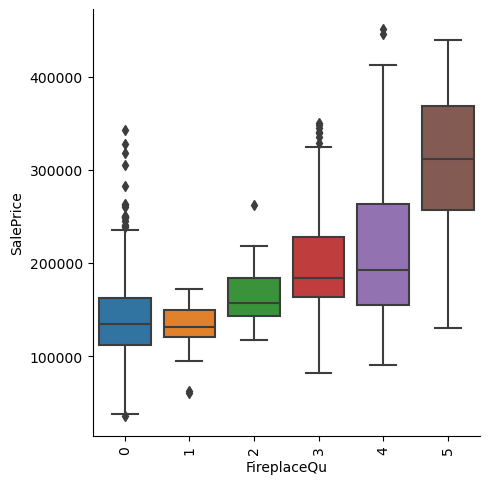

In [77]:
# Map FireplaceQu values to ordered integers as follows
df_housing.FireplaceQu = df_housing.FireplaceQu.fillna('No_fireplace')
df_housing.FireplaceQu = df_housing.FireplaceQu.map({'Ex': 5,
                                                 'Gd':4,
                                                 'TA':3,
                                                 'Fa':2,
                                                 'Po':1,
                                                 'No_fireplace':0
                                                })

df_housing.FireplaceQu = df_housing.FireplaceQu.astype(int)
plot_concat_var(df_housing, column_name='FireplaceQu', target='SalePrice' )#,hue='YrSold'

#### GarageYrBlt: 
Year garage was built

Null values in GarageYrBlt:  77
Null values in GarageYrBlt : 0


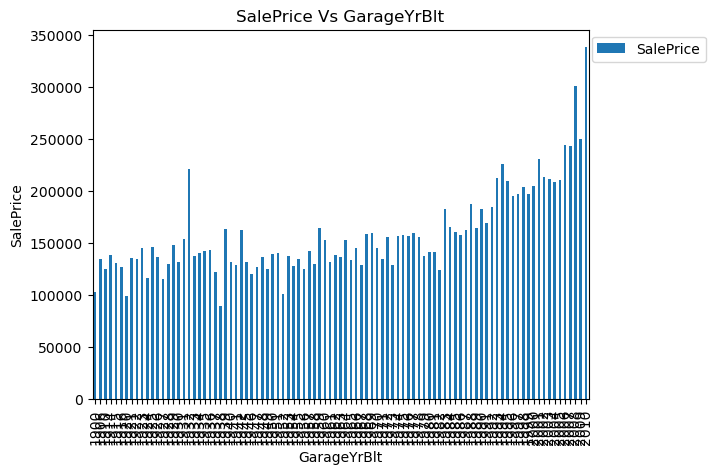

In [78]:
print("Null values in GarageYrBlt: ",df_housing.GarageYrBlt.isna().sum())
# Filling null rows with minimum year value
df_housing.GarageYrBlt = df_housing.GarageYrBlt.fillna(df_housing.GarageYrBlt.min())
df_housing.GarageYrBlt = df_housing.GarageYrBlt.astype(int)
plot_concat_var(df_housing, column_name='GarageYrBlt', target='SalePrice', plot_type='Bar' )#,hue='YrSold'

#### GarageFinish: 
Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

Null values in GarageFinish : 0


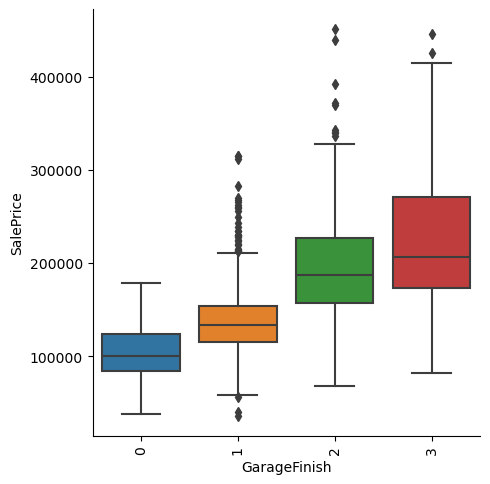

In [79]:
# Map GarageFinish values to ordered integers as follows
df_housing.GarageFinish = df_housing.GarageFinish.fillna('No_Garage')
df_housing.GarageFinish = df_housing.GarageFinish.map({
                                                 'Fin':3,
                                                 'RFn':2,
                                                 'Unf':1,
                                                 'No_Garage':0
                                                })

df_housing.GarageFinish = df_housing.GarageFinish.astype(int)
plot_concat_var(df_housing, column_name='GarageFinish', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between Interior finish of the garage and target variable.

#### GarageCars: 
Size of garage in car capacity

Null values in GarageCars : 0


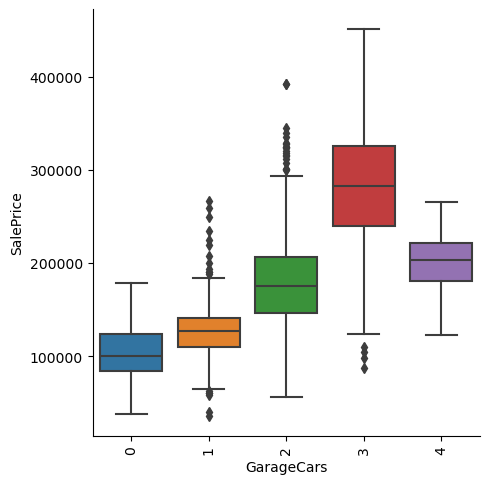

In [80]:
df_housing.GarageCars = df_housing.GarageCars.astype(int)
plot_concat_var(df_housing, column_name='GarageCars', target='SalePrice' )#,hue='YrSold'

#### GarageQual:
Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Null values in GarageQual : 0


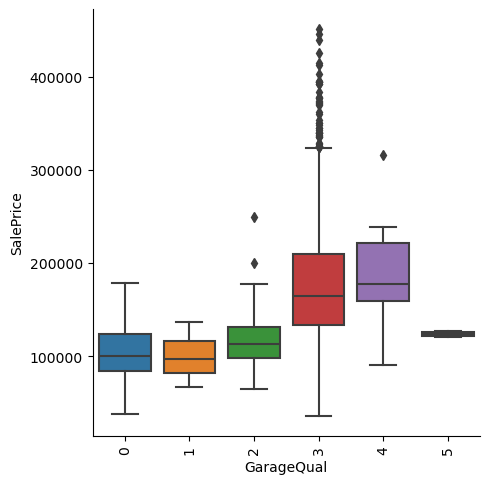

In [81]:
# Map GarageQual values to ordered integers as follows
df_housing.GarageQual = df_housing.GarageQual.fillna('No_Garage')
df_housing.GarageQual = df_housing.GarageQual.map({'Ex':5,
                                                       'Gd':4,
                                                       'TA':3,
                                                       'Fa':2,
                                                       'Po':1,
                                                       'No_Garage':0
                                                      })

df_housing.GarageQual = df_housing.GarageQual.astype(int)
plot_concat_var(df_housing, column_name='GarageQual', target='SalePrice' )#,hue='YrSold'

#### GarageCond: 
Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Null values in GarageCond : 0


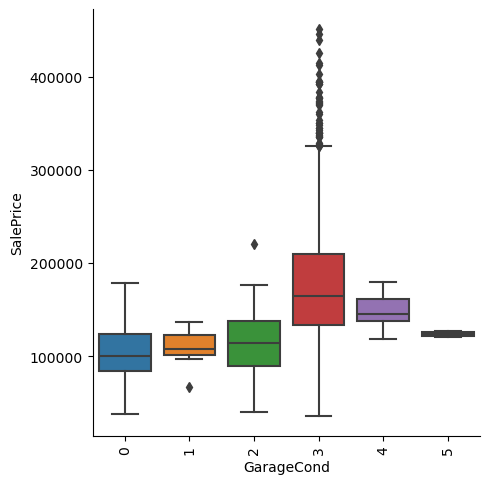

In [82]:
# Map GarageCond values to ordered integers as follows
df_housing.GarageCond = df_housing.GarageCond.fillna('No_Garage')
df_housing.GarageCond = df_housing.GarageCond.map({'Ex':5,
                                                       'Gd':4,
                                                       'TA':3,
                                                       'Fa':2,
                                                       'Po':1,
                                                       'No_Garage':0
                                                      })

df_housing.GarageCond = df_housing.GarageCond.astype(int)
plot_concat_var(df_housing, column_name='GarageCond', target='SalePrice' )#,hue='YrSold'

### PavedDrive: 
Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

Null values in PavedDrive : 0


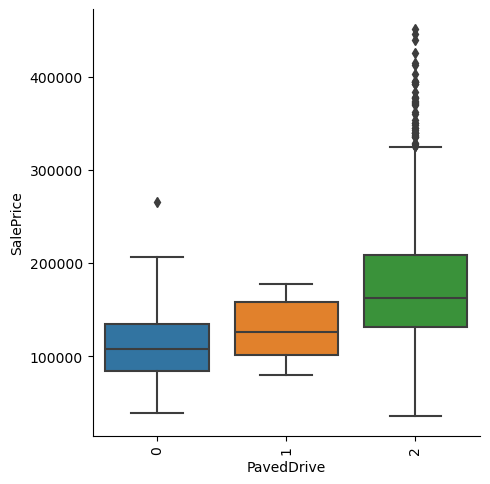

In [83]:
# Map PavedDrive values to ordered integers as follows
df_housing.PavedDrive = df_housing.PavedDrive.map({'Y':2,
                                                   'P':1,
                                                   'N':0
                                                  })

df_housing.PavedDrive = df_housing.PavedDrive.astype(int)
plot_concat_var(df_housing, column_name='PavedDrive', target='SalePrice' )#,hue='YrSold'

#### MoSold:
Month Sold (MM)


Null values in MoSold : 0


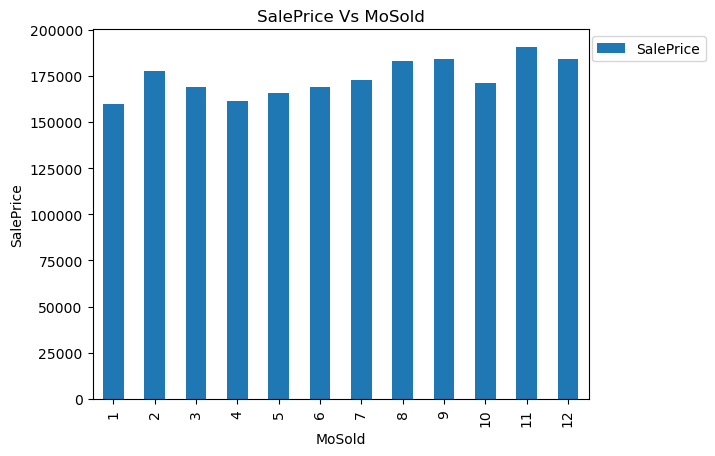

In [84]:
df_housing.MoSold = df_housing.MoSold.astype(int)
plot_concat_var(df_housing, column_name='MoSold', target='SalePrice', plot_type='Bar' )#,hue='YrSold'

#### YrSold: 
Year Sold (YYYY)

Null values in YrSold : 0


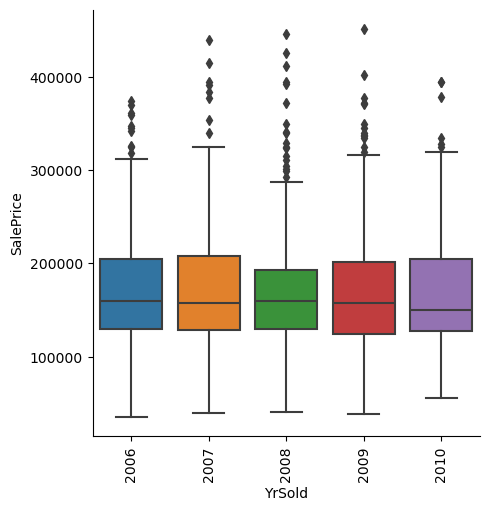

In [85]:
df_housing.YrSold = df_housing.YrSold.astype(int)
plot_concat_var(df_housing, column_name='YrSold', target='SalePrice' )#,hue='YrSold'

In [86]:
# There is not much correlation between YrSold and target variable so we can drop YrSold column from analysis.
df_housing = df_housing.drop('YrSold', axis=1)

#### Utilities: 
Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

This variable is an ordered catagorical varible

Null values in Utilities : 0


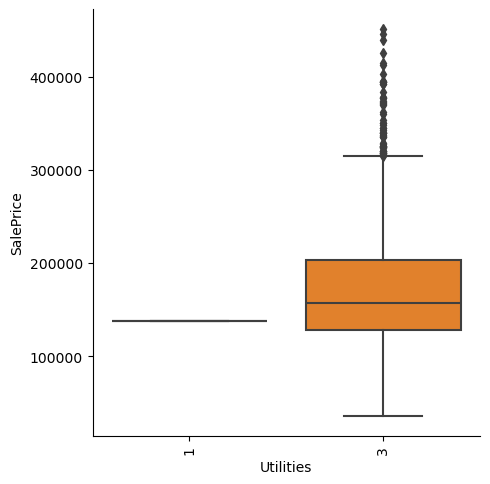

In [87]:
# Map PavedDrive values to ordered integers as follows
df_housing.Utilities = df_housing.Utilities.map({'AllPub':3,
                                                 'NoSewr':2,
                                                 'NoSeWa':1,
                                                 'ELO':0
                                                  })

df_housing.Utilities = df_housing.Utilities.astype(int)
plot_concat_var(df_housing, column_name='Utilities', target='SalePrice' )#,hue='YrSold'

In [88]:
# There are no values present for catagory 0,1,2 so we can drop this column
df_housing = df_housing.drop('Utilities', axis=1)

#### LandSlope: 
Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

Null values in LandSlope : 0


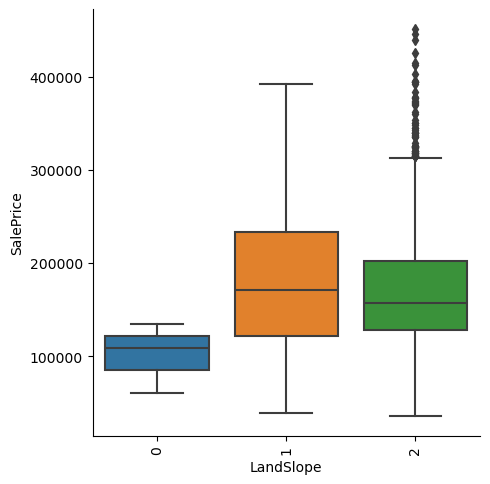

In [89]:
# Map LandSlope values to ordered integers as follows
df_housing.LandSlope = df_housing.LandSlope.map({'Gtl':2,
                                                 'Mod':1,
                                                 'Sev':0
                                                  })

df_housing.LandSlope = df_housing.LandSlope.astype(int)
plot_concat_var(df_housing, column_name='LandSlope', target='SalePrice' )#,hue='YrSold'

#### Electrical:
Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [90]:
print("Null values: ",df_housing.Electrical.isna().sum())
set(df_housing.Electrical)

Null values:  1


{'FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr', nan}

Null values in Electrical : 0


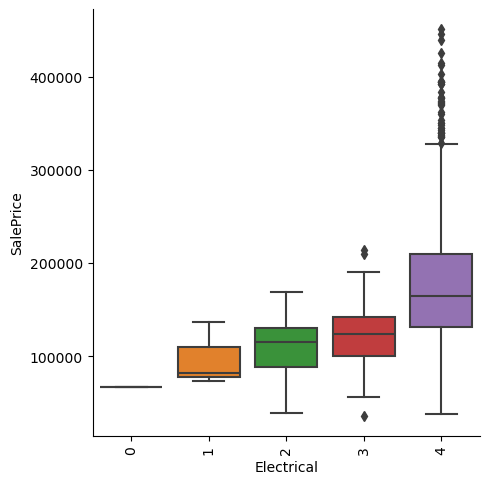

In [91]:

# Drop null row
df_housing = df_housing[~df_housing.Electrical.isna()]
# Map Electrical values to ordered integers as follows
df_housing.Electrical = df_housing.Electrical.map({'SBrkr':4,
                                                   'FuseA':3,
                                                   'FuseF':2,
                                                   'FuseP':1,
                                                   'Mix':0
                                                  })
df_housing.Electrical = df_housing.Electrical.astype(int)
plot_concat_var(df_housing, column_name='Electrical', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between Electrical system and target variable.

### Univariate analysis on catagorical variables:

#### MSSubClass: 
Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
And there is no null value prese, This variable is catagorical value.nt in this column

Null values in MSSubClass : 0


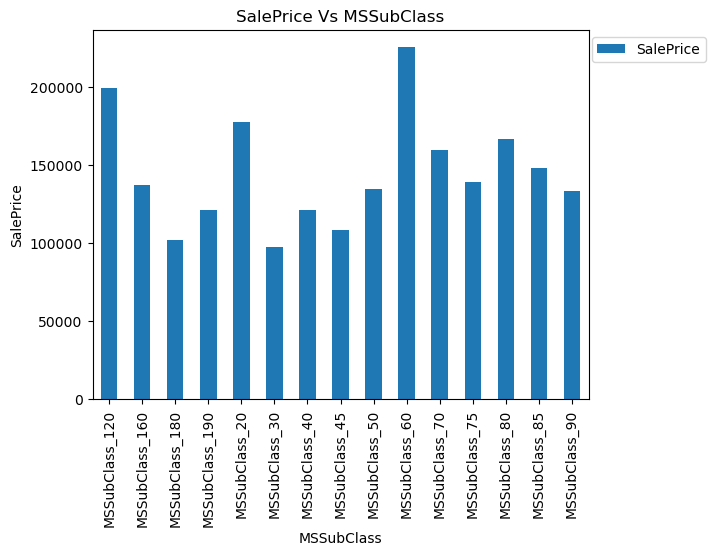

In [92]:
df_housing.MSSubClass = df_housing.MSSubClass.map({20:'MSSubClass_20',
                                                   30:'MSSubClass_30',
                                                   40:'MSSubClass_40',
                                                   45:'MSSubClass_45',
                                                   50:'MSSubClass_50',
                                                   60:'MSSubClass_60',
                                                   70:'MSSubClass_70',
                                                   75:'MSSubClass_75',
                                                   80:'MSSubClass_80',
                                                   85:'MSSubClass_85',
                                                   90:'MSSubClass_90',
                                                   120:'MSSubClass_120',
                                                   150:'MSSubClass_150',
                                                   160:'MSSubClass_160',
                                                   180:'MSSubClass_180',
                                                   190:'MSSubClass_190'
                                          })
plot_concat_var(df_housing, column_name='MSSubClass', target='SalePrice' , plot_type='Bar')#,hue='YrSold'

In [93]:
df_housing = make_dummys(df_housing, 'MSSubClass')
df_housing.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,RL,65.0,8450,Pave,0,3,Lvl,Inside,2,CollgCr,...,0,0,0,0,1,0,0,0,0,0
1,RL,80.0,9600,Pave,0,3,Lvl,FR2,2,Veenker,...,0,0,0,0,0,0,0,0,0,0
2,RL,68.0,11250,Pave,0,2,Lvl,Inside,2,CollgCr,...,0,0,0,0,1,0,0,0,0,0
3,RL,60.0,9550,Pave,0,2,Lvl,Corner,2,Crawfor,...,0,0,0,0,0,1,0,0,0,0
4,RL,84.0,14260,Pave,0,2,Lvl,FR2,2,NoRidge,...,0,0,0,0,1,0,0,0,0,0


#### MSZoning: 
Identifies the general zoning classification of the sale.<br>
- A &emsp; Agriculture<br>
- C&emsp;Commercial<br>
- FV&emsp;Floating Village Residential<br>
- I&emsp;Industrial<br>
- RH&emsp;Residential High Density<br>
- RL&emsp;Residential Low Density<br>
- RP&emsp;Residential Low Density Park<br> 
- RM&emsp;Residential Medium Density<br>

There are no null values present in this column

Null values in MSZoning : 8


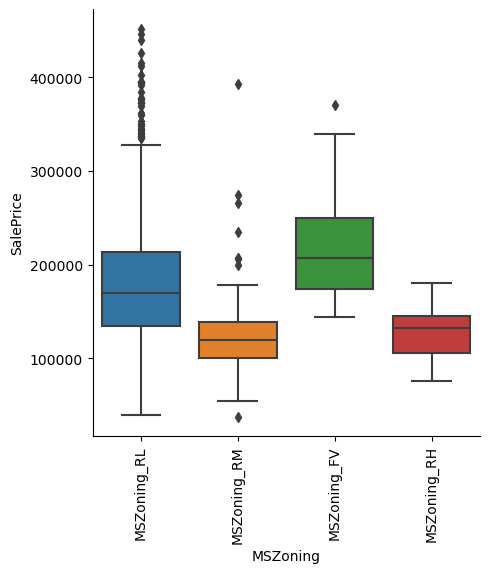

In [94]:
df_housing.MSZoning = df_housing.MSZoning.map({'A':'MSZoning_A', 
                                           'C':'MSZoning_C', 
                                           'FV':'MSZoning_FV',
                                           'I':'MSZoning_I',
                                           'RH': 'MSZoning_RH',
                                           'RL': 'MSZoning_RL',
                                           'RP': 'MSZoning_RP',
                                           'RM': 'MSZoning_RM'
                                          })
plot_concat_var(df_housing, column_name='MSZoning', target='SalePrice' )#,hue='YrSold'

As per observation from plot Floating Village Residential houses sold for higher prices compared with other catagories.
Also there are only 4 catagories in 'MSZoning' column
This column contains independent catagorical values so we can make dummy variables from this column as follows.

In [95]:
df_housing = make_dummys(df_housing, 'MSZoning')
df_housing.head()

,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,65.0,8450,Pave,0,3,Lvl,Inside,2,CollgCr,Norm,...,0,1,0,0,0,0,0,0,1,0
1,80.0,9600,Pave,0,3,Lvl,FR2,2,Veenker,Feedr,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,Pave,0,2,Lvl,Inside,2,CollgCr,Norm,...,0,1,0,0,0,0,0,0,1,0
3,60.0,9550,Pave,0,2,Lvl,Corner,2,Crawfor,Norm,...,0,0,1,0,0,0,0,0,1,0
4,84.0,14260,Pave,0,2,Lvl,FR2,2,NoRidge,Norm,...,0,1,0,0,0,0,0,0,1,0


#### Street:
Type of road access to property<br>
- Grvl &emsp; Gravel <br>
-  Pav &emsp; 	Paved

Null values in Street : 0


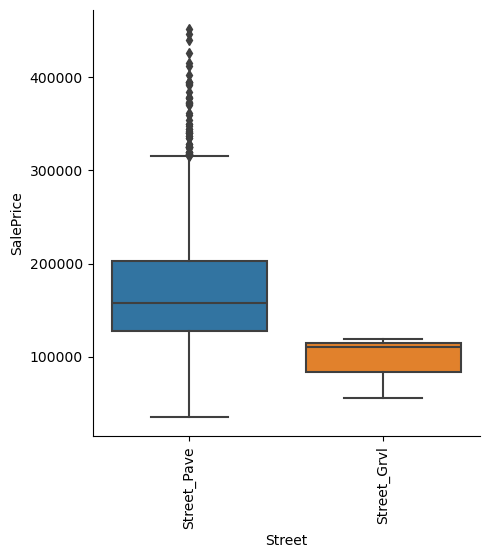

In [96]:
df_housing.Street = df_housing.Street.map({'Grvl':'Street_Grvl', 
                                           'Pave':'Street_Pave', 
                                          })
plot_concat_var(df_housing, column_name='Street', target='SalePrice' )#,hue='YrSold'

As per observaion from plot Street, more number of sales happend on Paved properties with high price compared with gravel lands.
We will make dummy variables from this columns as follows.

In [97]:
df_housing = make_dummys(df_housing, 'Street')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave
0,65.0,8450,0,3,Lvl,Inside,2,CollgCr,Norm,Norm,...,1,0,0,0,0,0,0,1,0,1
1,80.0,9600,0,3,Lvl,FR2,2,Veenker,Feedr,Norm,...,0,0,0,0,0,0,0,1,0,1
2,68.0,11250,0,2,Lvl,Inside,2,CollgCr,Norm,Norm,...,1,0,0,0,0,0,0,1,0,1
3,60.0,9550,0,2,Lvl,Corner,2,Crawfor,Norm,Norm,...,0,1,0,0,0,0,0,1,0,1
4,84.0,14260,0,2,Lvl,FR2,2,NoRidge,Norm,Norm,...,1,0,0,0,0,0,0,1,0,1


#### LandContour:
Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

This variable is an un-ordered catagorical variable so we can make dummy variables from this column.

Null values in LandContour : 0


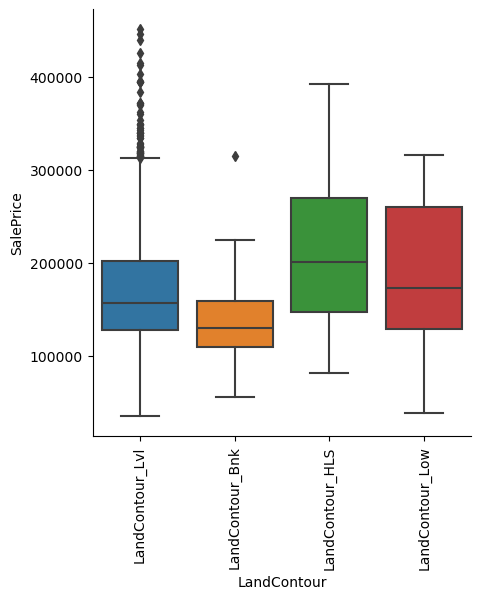

In [98]:
df_housing.LandContour = df_housing.LandContour.map({'Lvl':'LandContour_Lvl', 
                                           'Bnk':'LandContour_Bnk', 
                                           'HLS':'LandContour_HLS', 
                                           'Low':'LandContour_Low', 
                                          })
plot_concat_var(df_housing, column_name='LandContour', target='SalePrice' )#,hue='YrSold'

In [99]:
df_housing = make_dummys(df_housing, 'LandContour')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,65.0,8450,0,3,Inside,2,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,1,0,1,0,0,1
1,80.0,9600,0,3,FR2,2,Veenker,Feedr,Norm,1Fam,...,0,0,0,0,1,0,1,0,0,1
2,68.0,11250,0,2,Inside,2,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,1,0,1,0,0,1
3,60.0,9550,0,2,Corner,2,Crawfor,Norm,Norm,1Fam,...,0,0,0,0,1,0,1,0,0,1
4,84.0,14260,0,2,FR2,2,NoRidge,Norm,Norm,1Fam,...,0,0,0,0,1,0,1,0,0,1


#### LotConfig: 
Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

This variable is an un-ordered catagorical variable

Null values in LotConfig : 0


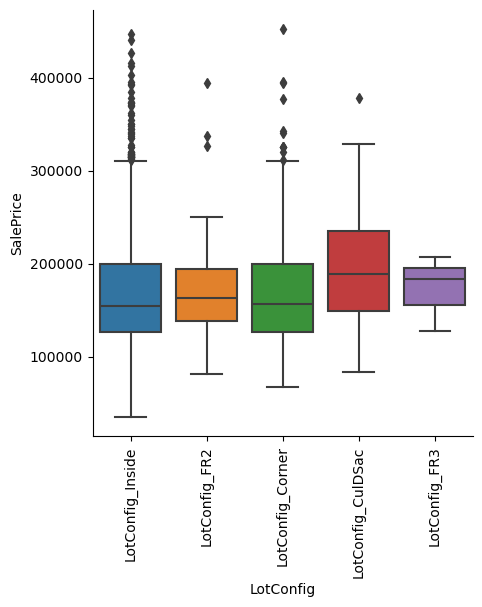

In [100]:
df_housing.LotConfig = df_housing.LotConfig.map({'Inside':'LotConfig_Inside', 
                                                 'Corner':'LotConfig_Corner',
                                                 'CulDSac':'LotConfig_CulDSac',
                                                 'FR2':'LotConfig_FR2',
                                                 'FR3':'LotConfig_FR3',
                                                })
plot_concat_var(df_housing, column_name='LotConfig', target='SalePrice' )#,hue='YrSold'

In [101]:
df_housing = make_dummys(df_housing, 'LotConfig')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,65.0,8450,0,3,2,CollgCr,Norm,Norm,1Fam,2Story,...,1,0,1,0,0,1,0,0,0,1
1,80.0,9600,0,3,2,Veenker,Feedr,Norm,1Fam,1Story,...,1,0,1,0,0,1,0,1,0,0
2,68.0,11250,0,2,2,CollgCr,Norm,Norm,1Fam,2Story,...,1,0,1,0,0,1,0,0,0,1
3,60.0,9550,0,2,2,Crawfor,Norm,Norm,1Fam,2Story,...,1,0,1,0,0,1,0,0,0,0
4,84.0,14260,0,2,2,NoRidge,Norm,Norm,1Fam,2Story,...,1,0,1,0,0,1,0,1,0,0


#### Neighborhood: 
Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

Null values in Neighborhood : 0


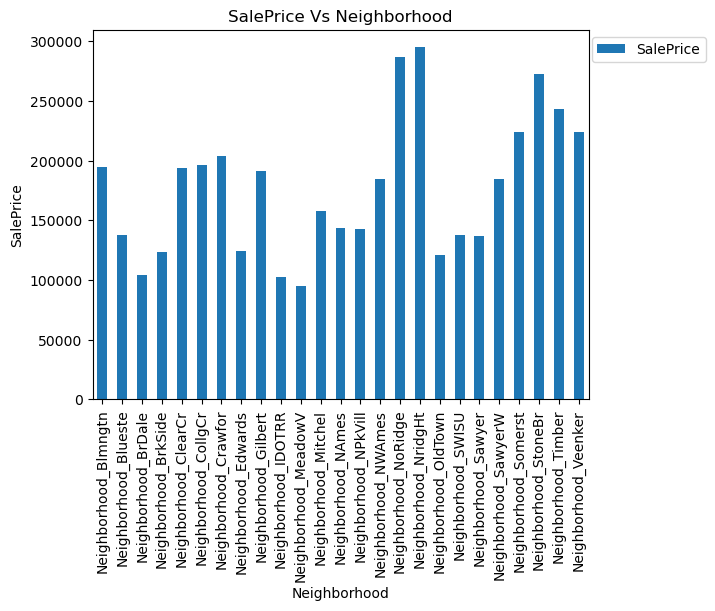

In [102]:
# Appending variable name with value
df_housing.Neighborhood = df_housing.Neighborhood.apply(lambda x:'Neighborhood_'+x)
plot_concat_var(df_housing, column_name='Neighborhood', target='SalePrice', plot_type='Bar' )#,hue='YrSold'

In [103]:
df_housing = make_dummys(df_housing, 'Neighborhood')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,65.0,8450,0,3,2,Norm,Norm,1Fam,2Story,7,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,0,3,2,Feedr,Norm,1Fam,1Story,6,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250,0,2,2,Norm,Norm,1Fam,2Story,7,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,0,2,2,Norm,Norm,1Fam,2Story,7,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,0,2,2,Norm,Norm,1Fam,2Story,8,...,1,0,0,0,0,0,0,0,0,0


#### Condition1: 
Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

I am not sure about this column whether it fall in to ordered catagorical or not, So we are making dummy variables from this column.

Null values in Condition1 : 0


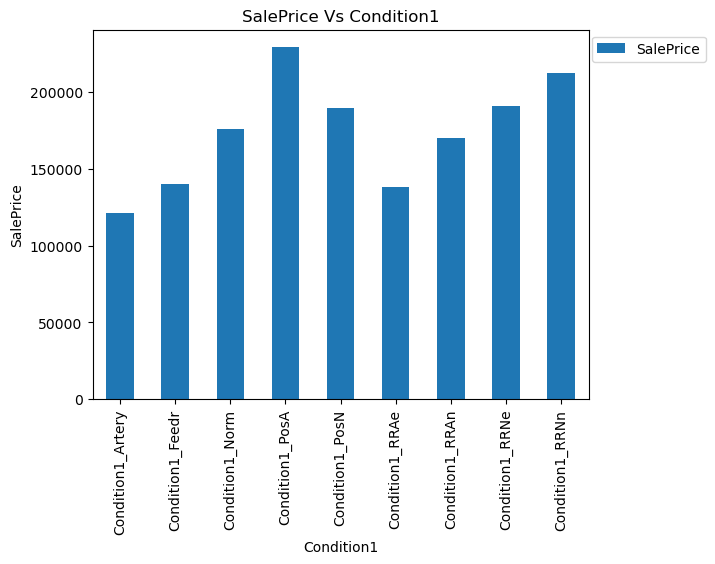

In [104]:
# Appending variable name with value
df_housing.Condition1 = df_housing.Condition1.apply(lambda x:'Condition1_'+x)
plot_concat_var(df_housing, column_name='Condition1', target='SalePrice', plot_type='Bar' )#,hue='YrSold'

In [105]:
df_housing = make_dummys(df_housing, 'Condition1')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LandSlope,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,...,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn
0,65.0,8450,0,3,2,Norm,1Fam,2Story,7,5,...,0,0,0,1,0,0,0,0,0,0
1,80.0,9600,0,3,2,Norm,1Fam,1Story,6,8,...,0,1,1,0,0,0,0,0,0,0
2,68.0,11250,0,2,2,Norm,1Fam,2Story,7,5,...,0,0,0,1,0,0,0,0,0,0
3,60.0,9550,0,2,2,Norm,1Fam,2Story,7,5,...,0,0,0,1,0,0,0,0,0,0
4,84.0,14260,0,2,2,Norm,1Fam,2Story,8,5,...,0,0,0,1,0,0,0,0,0,0


#### Condition2: 
Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad


Null values in Condition2 : 0


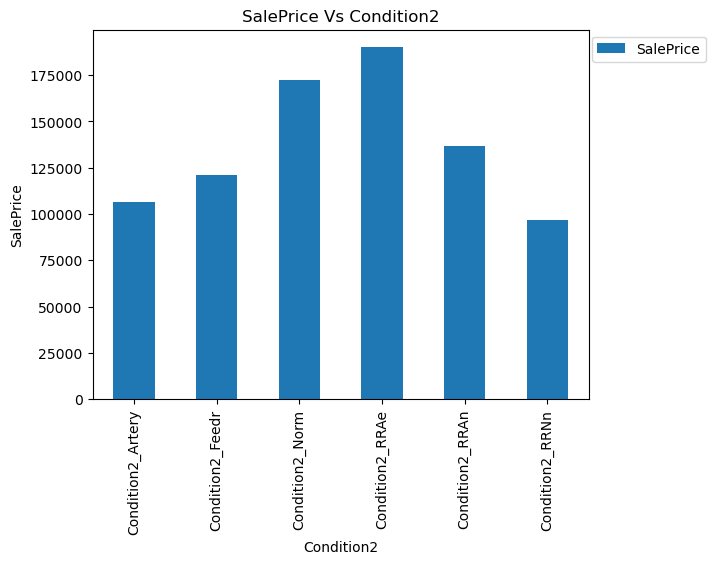

In [106]:
# Appending variable name with value
df_housing.Condition2 = df_housing.Condition2.apply(lambda x:'Condition2_'+x)
plot_concat_var(df_housing, column_name='Condition2', target='SalePrice', plot_type='Bar' )#,hue='YrSold'

In [142]:
df_housing = make_dummys(df_housing, 'Condition2')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Condition2_Feedr,Condition2_Norm,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn
0,65.0,8450,0,3,2,7,5,2003,2003,196.0,...,0,0,0,1,0,0,1,0,0,0
1,80.0,9600,0,3,2,6,8,1976,1976,0.0,...,0,0,0,1,0,0,1,0,0,0
2,68.0,11250,0,2,2,7,5,2001,2002,162.0,...,0,0,0,1,0,0,1,0,0,0
3,60.0,9550,0,2,2,7,5,1915,1970,0.0,...,0,0,0,0,0,0,1,0,0,0
4,84.0,14260,0,2,2,8,5,2000,2000,350.0,...,0,0,0,1,0,0,1,0,0,0


#### BldgType: 
Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

There is a charector missmatch between data dictionary and data file for this column.

Null values in BldgType : 0


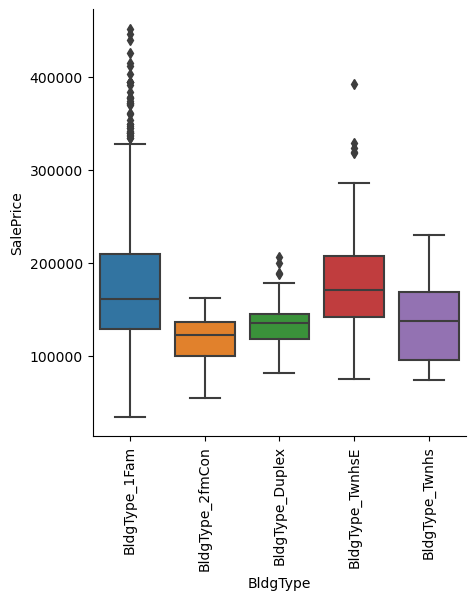

In [107]:
# Appending variable name with value
df_housing.BldgType = df_housing.BldgType.apply(lambda x:'BldgType_'+x)
plot_concat_var(df_housing, column_name='BldgType', target='SalePrice' )#,hue='YrSold'

In [108]:
df_housing = make_dummys(df_housing, 'BldgType')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LandSlope,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,...,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,65.0,8450,0,3,2,Condition2_Norm,2Story,7,5,2003,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,0,3,2,Condition2_Norm,1Story,6,8,1976,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,0,2,2,Condition2_Norm,2Story,7,5,2001,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,0,2,2,Condition2_Norm,2Story,7,5,1915,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,0,2,2,Condition2_Norm,2Story,8,5,2000,...,0,0,0,0,0,0,0,0,0,0


#### HouseStyle:
Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [109]:
set(df_housing.HouseStyle)

{'1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl'}

Null values in HouseStyle : 0


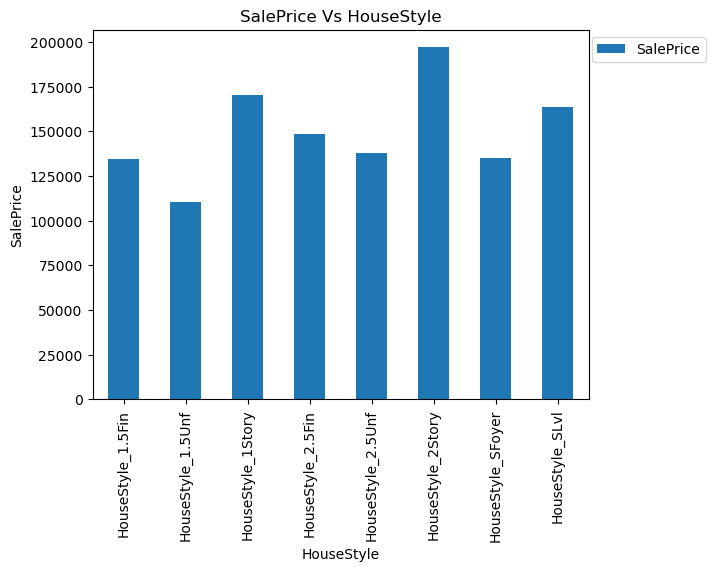

In [110]:
# Appending variable name with value
df_housing.HouseStyle = df_housing.HouseStyle.apply(lambda x:'HouseStyle_'+x)
plot_concat_var(df_housing, column_name='HouseStyle', target='SalePrice', plot_type='Bar' )#,hue='YrSold'

In [111]:
df_housing = make_dummys(df_housing, 'HouseStyle')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LandSlope,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,65.0,8450,0,3,2,Condition2_Norm,7,5,2003,2003,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,0,3,2,Condition2_Norm,6,8,1976,1976,...,0,0,0,0,1,0,0,0,0,0
2,68.0,11250,0,2,2,Condition2_Norm,7,5,2001,2002,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,0,2,2,Condition2_Norm,7,5,1915,1970,...,0,0,0,0,0,0,0,1,0,0
4,84.0,14260,0,2,2,Condition2_Norm,8,5,2000,2000,...,0,0,0,0,0,0,0,1,0,0


#### RoofStyle:
Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

Null values in RoofStyle : 0


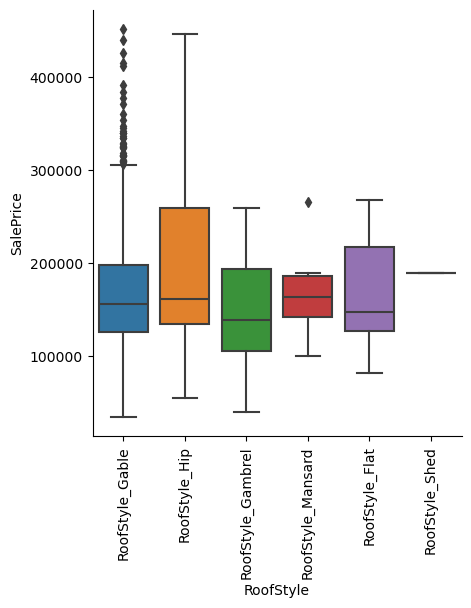

In [112]:
# Appending variable name with value
df_housing.RoofStyle = df_housing.RoofStyle.apply(lambda x:'RoofStyle_'+x)
plot_concat_var(df_housing, column_name='RoofStyle', target='SalePrice' )#,hue='YrSold'

In [113]:
df_housing = make_dummys(df_housing, 'RoofStyle')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LandSlope,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,65.0,8450,0,3,2,Condition2_Norm,7,5,2003,2003,...,0,0,1,0,0,1,0,0,0,0
1,80.0,9600,0,3,2,Condition2_Norm,6,8,1976,1976,...,0,0,0,0,0,1,0,0,0,0
2,68.0,11250,0,2,2,Condition2_Norm,7,5,2001,2002,...,0,0,1,0,0,1,0,0,0,0
3,60.0,9550,0,2,2,Condition2_Norm,7,5,1915,1970,...,0,0,1,0,0,1,0,0,0,0
4,84.0,14260,0,2,2,Condition2_Norm,8,5,2000,2000,...,0,0,1,0,0,1,0,0,0,0


#### RoofMatl:
Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Null values in RoofMatl : 0


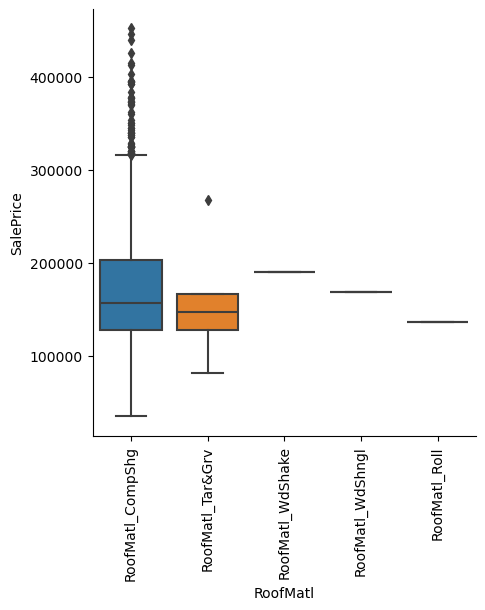

In [114]:
# Appending variable name with value
df_housing.RoofMatl = df_housing.RoofMatl.apply(lambda x:'RoofMatl_'+x)
plot_concat_var(df_housing, column_name='RoofMatl', target='SalePrice' )#,hue='YrSold'

In [115]:
#df_housing = make_dummys(df_housing, 'RoofMatl')
#df_housing.head()
# There is no balance in categories so we can drop this column 
df_housing = df_housing.drop('RoofMatl', axis=1)

#### Exterior1st:
Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Null values in Exterior1st : 0


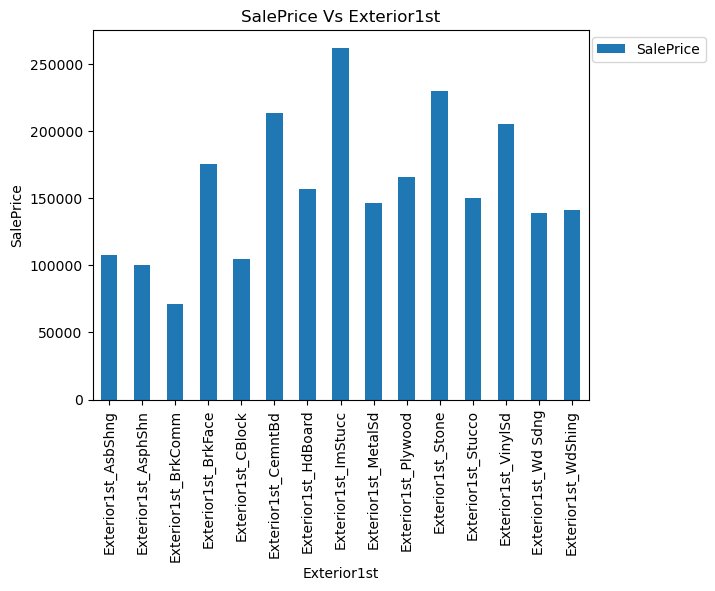

In [116]:
# Appending variable name with value
df_housing.Exterior1st = df_housing.Exterior1st.apply(lambda x:'Exterior1st_'+x)
plot_concat_var(df_housing, column_name='Exterior1st', target='SalePrice', plot_type='Bar' )#,hue='YrSold'

In [117]:
df_housing = make_dummys(df_housing, 'Exterior1st')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LandSlope,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,65.0,8450,0,3,2,Condition2_Norm,7,5,2003,2003,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,0,3,2,Condition2_Norm,6,8,1976,1976,...,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,0,2,2,Condition2_Norm,7,5,2001,2002,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,0,2,2,Condition2_Norm,7,5,1915,1970,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,0,2,2,Condition2_Norm,8,5,2000,2000,...,0,0,0,0,0,0,0,1,0,0


#### Exterior2nd: 
Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Null values in Exterior2nd : 0


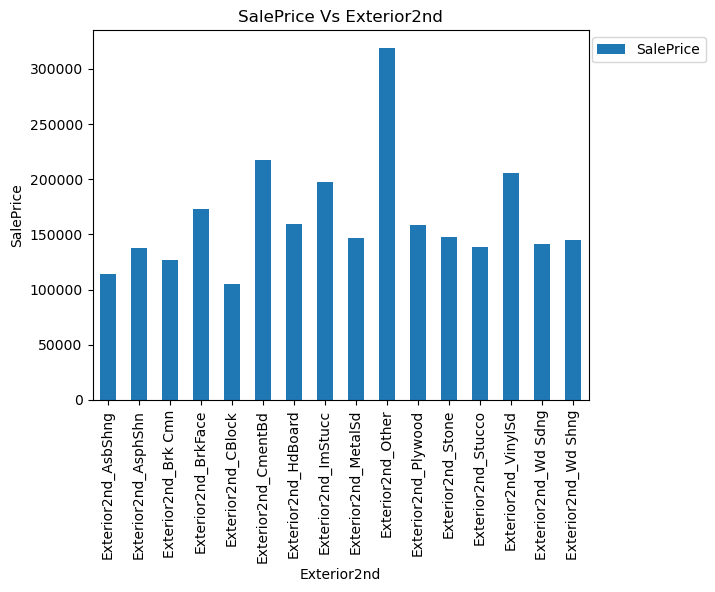

In [118]:
# Appending variable name with value
df_housing.Exterior2nd = df_housing.Exterior2nd.apply(lambda x:'Exterior2nd_'+x)
plot_concat_var(df_housing, column_name='Exterior2nd', target='SalePrice', plot_type='Bar' )#,hue='YrSold'

In [119]:
df_housing = make_dummys(df_housing, 'Exterior2nd')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LandSlope,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,65.0,8450,0,3,2,Condition2_Norm,7,5,2003,2003,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,0,3,2,Condition2_Norm,6,8,1976,1976,...,0,0,1,0,0,0,0,0,0,0
2,68.0,11250,0,2,2,Condition2_Norm,7,5,2001,2002,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,0,2,2,Condition2_Norm,7,5,1915,1970,...,0,0,0,0,0,0,0,0,0,1
4,84.0,14260,0,2,2,Condition2_Norm,8,5,2000,2000,...,0,0,0,0,0,0,0,1,0,0


#### MasVnrType: 
Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [120]:
df_housing.MasVnrType.isna().sum()

798

Null values in MasVnrType : 0


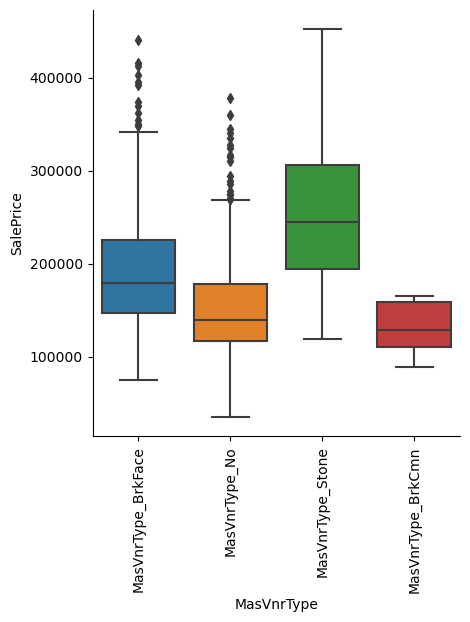

In [121]:
# Map MasVnrType values to ordered integers as follows
df_housing.MasVnrType = df_housing.MasVnrType.fillna('No')
df_housing.MasVnrType = df_housing.MasVnrType.apply(lambda x:'MasVnrType_'+x)
plot_concat_var(df_housing, column_name='MasVnrType', target='SalePrice' )#,hue='YrSold'


In [122]:
df_housing = make_dummys(df_housing, 'MasVnrType')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LandSlope,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No,MasVnrType_Stone
0,65.0,8450,0,3,2,Condition2_Norm,7,5,2003,2003,...,0,0,0,0,1,0,0,1,0,0
1,80.0,9600,0,3,2,Condition2_Norm,6,8,1976,1976,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,0,2,2,Condition2_Norm,7,5,2001,2002,...,0,0,0,0,1,0,0,1,0,0
3,60.0,9550,0,2,2,Condition2_Norm,7,5,1915,1970,...,0,0,0,0,0,0,1,0,1,0
4,84.0,14260,0,2,2,Condition2_Norm,8,5,2000,2000,...,0,0,0,0,1,0,0,1,0,0


#### Foundation: 
Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

Null values in Foundation : 0


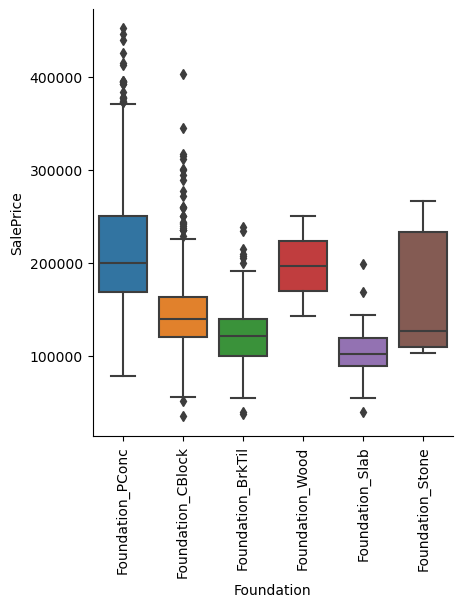

In [123]:
# Map MasVnrType values to ordered integers as follows
#df_housing.Foundation = df_housing.Foundation.fillna('No')
df_housing.Foundation = df_housing.Foundation.apply(lambda x:'Foundation_'+x)
plot_concat_var(df_housing, column_name='Foundation', target='SalePrice' )#,hue='YrSold'


In [124]:
df_housing = make_dummys(df_housing, 'Foundation')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LandSlope,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,65.0,8450,0,3,2,Condition2_Norm,7,5,2003,2003,...,0,0,1,0,0,0,1,0,0,0
1,80.0,9600,0,3,2,Condition2_Norm,6,8,1976,1976,...,0,0,0,1,0,1,0,0,0,0
2,68.0,11250,0,2,2,Condition2_Norm,7,5,2001,2002,...,0,0,1,0,0,0,1,0,0,0
3,60.0,9550,0,2,2,Condition2_Norm,7,5,1915,1970,...,0,1,0,1,0,0,0,0,0,0
4,84.0,14260,0,2,2,Condition2_Norm,8,5,2000,2000,...,0,0,1,0,0,0,1,0,0,0


#### Heating: 
Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

Null values in Heating : 0


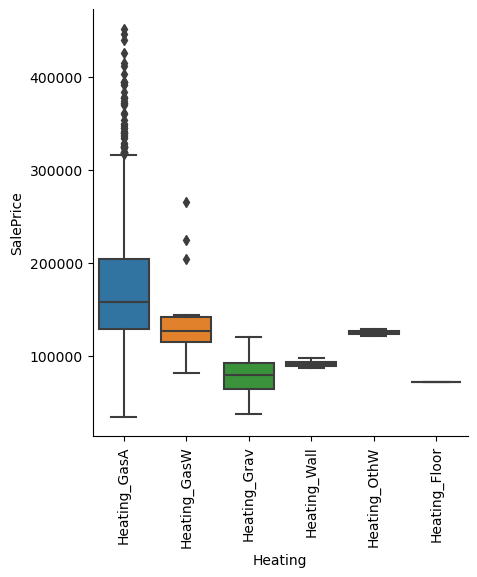

In [125]:
# Map Heating values to ordered integers as follows
df_housing.Heating = df_housing.Heating.apply(lambda x:'Heating_'+x)
plot_concat_var(df_housing, column_name='Heating', target='SalePrice' )#,hue='YrSold'

In [151]:
df_housing = make_dummys(df_housing, 'Heating')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Condition2_Feedr,Condition2_Norm,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,65.0,8450,0,3,2,7,5,2003,2003,196.0,...,0,1,0,0,0,1,0,0,0,0
1,80.0,9600,0,3,2,6,8,1976,1976,0.0,...,0,1,0,0,0,1,0,0,0,0
2,68.0,11250,0,2,2,7,5,2001,2002,162.0,...,0,1,0,0,0,1,0,0,0,0
3,60.0,9550,0,2,2,7,5,1915,1970,0.0,...,0,1,0,0,0,1,0,0,0,0
4,84.0,14260,0,2,2,8,5,2000,2000,350.0,...,0,1,0,0,0,1,0,0,0,0


#### CentralAir: 
Central air conditioning

       N	No
       Y	Yes

Null values in CentralAir : 0


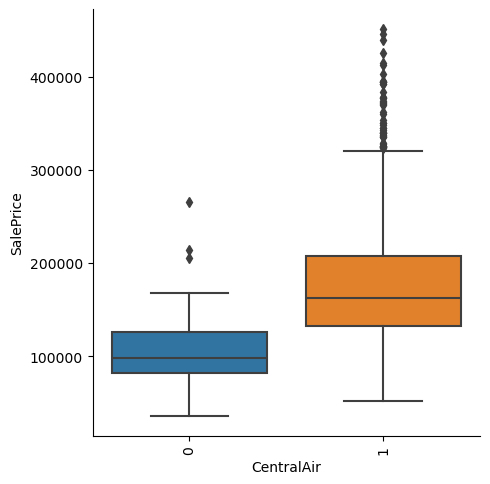

In [126]:
# Map CentralAir values to ordered integers as follows
df_housing.CentralAir = df_housing.CentralAir.map({'N':0,'Y':1})
df_housing.CentralAir = df_housing.CentralAir.astype(int)
plot_concat_var(df_housing, column_name='CentralAir', target='SalePrice' )#,hue='YrSold'

#### GarageType: 
Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

Null values in GarageType : 0


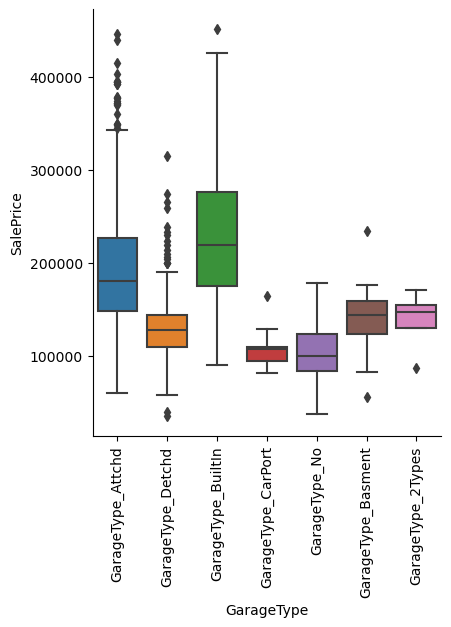

In [127]:
df_housing.GarageType = df_housing.GarageType.fillna('No')
# Map Electrical values to ordered integers as follows
df_housing.GarageType = df_housing.GarageType.apply(lambda x: 'GarageType_'+x)
plot_concat_var(df_housing, column_name='GarageType', target='SalePrice' )#,hue='YrSold'

In [128]:
df_housing = make_dummys(df_housing, 'GarageType')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LandSlope,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No
0,65.0,8450,0,3,2,Condition2_Norm,7,5,2003,2003,...,1,0,0,0,1,0,0,0,0,0
1,80.0,9600,0,3,2,Condition2_Norm,6,8,1976,1976,...,0,0,0,0,1,0,0,0,0,0
2,68.0,11250,0,2,2,Condition2_Norm,7,5,2001,2002,...,1,0,0,0,1,0,0,0,0,0
3,60.0,9550,0,2,2,Condition2_Norm,7,5,1915,1970,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,0,2,2,Condition2_Norm,8,5,2000,2000,...,1,0,0,0,1,0,0,0,0,0


#### MiscFeature: 
Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

Null values in MiscFeature : 0


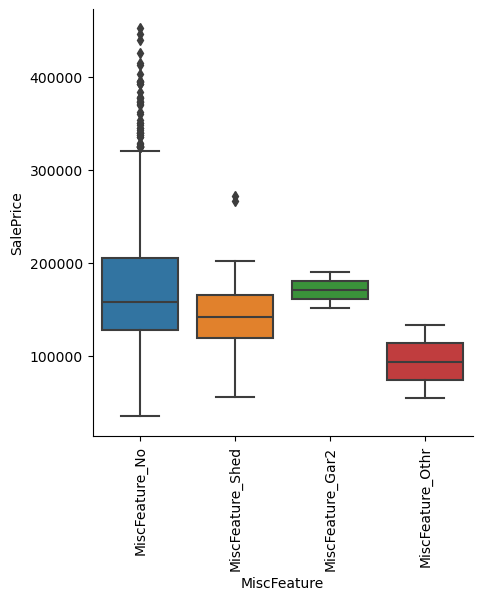

In [129]:
df_housing.MiscFeature = df_housing.MiscFeature.fillna('No')
# Map MiscFeature values to ordered integers as follows
df_housing.MiscFeature = df_housing.MiscFeature.apply(lambda x: 'MiscFeature_'+x)
plot_concat_var(df_housing, column_name='MiscFeature', target='SalePrice' )#,hue='YrSold'

In [130]:
df_housing = make_dummys(df_housing, 'MiscFeature')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LandSlope,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed
0,65.0,8450,0,3,2,Condition2_Norm,7,5,2003,2003,...,0,1,0,0,0,0,0,1,0,0
1,80.0,9600,0,3,2,Condition2_Norm,6,8,1976,1976,...,0,1,0,0,0,0,0,1,0,0
2,68.0,11250,0,2,2,Condition2_Norm,7,5,2001,2002,...,0,1,0,0,0,0,0,1,0,0
3,60.0,9550,0,2,2,Condition2_Norm,7,5,1915,1970,...,0,0,0,0,0,1,0,1,0,0
4,84.0,14260,0,2,2,Condition2_Norm,8,5,2000,2000,...,0,1,0,0,0,0,0,1,0,0


#### SaleType: 
Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

Null values in SaleType : 0


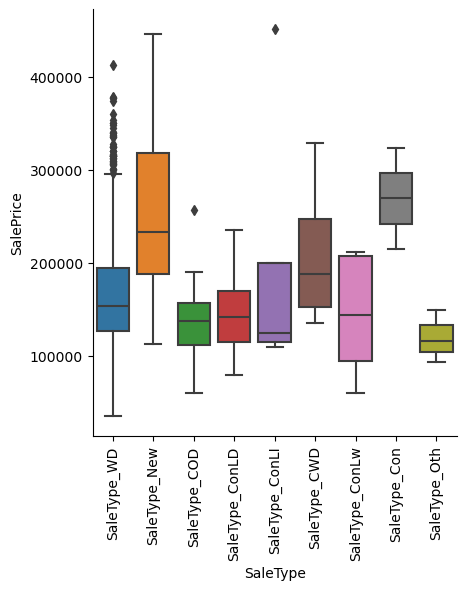

In [131]:
# Map MiscFeature values to ordered integers as follows
df_housing.SaleType = df_housing.SaleType.apply(lambda x: 'SaleType_'+x)
plot_concat_var(df_housing, column_name='SaleType', target='SalePrice' )#,hue='YrSold'

In [132]:
df_housing = make_dummys(df_housing, 'SaleType')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LandSlope,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,65.0,8450,0,3,2,Condition2_Norm,7,5,2003,2003,...,0,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,3,2,Condition2_Norm,6,8,1976,1976,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250,0,2,2,Condition2_Norm,7,5,2001,2002,...,0,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,2,2,Condition2_Norm,7,5,1915,1970,...,0,0,0,0,0,0,0,0,0,1
4,84.0,14260,0,2,2,Condition2_Norm,8,5,2000,2000,...,0,0,0,0,0,0,0,0,0,1


#### SaleCondition: 
Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

Null values in SaleCondition : 0


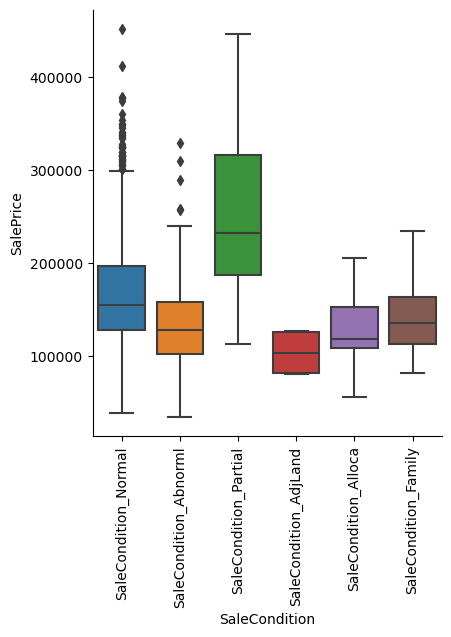

In [133]:
# Map MiscFeature values to ordered integers as follows
df_housing.SaleCondition = df_housing.SaleCondition.apply(lambda x: 'SaleCondition_'+x)
plot_concat_var(df_housing, column_name='SaleCondition', target='SalePrice' )#,hue='YrSold'

In [134]:
df_housing = make_dummys(df_housing, 'SaleCondition')
df_housing.head()

,LotFrontage,LotArea,Alley,LotShape,LandSlope,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,0,3,2,Condition2_Norm,7,5,2003,2003,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0,3,2,Condition2_Norm,6,8,1976,1976,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,0,2,2,Condition2_Norm,7,5,2001,2002,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0,2,2,Condition2_Norm,7,5,1915,1970,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,0,2,2,Condition2_Norm,8,5,2000,2000,...,0,0,0,0,1,0,0,0,1,0


In [145]:
df_housing.reset_index()

,index,LotFrontage,LotArea,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Condition2_Feedr,Condition2_Norm,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn
0,0,65.0,8450,0,3,2,7,5,2003,2003,...,0,0,0,1,0,0,1,0,0,0
1,1,80.0,9600,0,3,2,6,8,1976,1976,...,0,0,0,1,0,0,1,0,0,0
2,2,68.0,11250,0,2,2,7,5,2001,2002,...,0,0,0,1,0,0,1,0,0,0
3,3,60.0,9550,0,2,2,7,5,1915,1970,...,0,0,0,0,0,0,1,0,0,0
4,4,84.0,14260,0,2,2,8,5,2000,2000,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,1454,62.0,7500,2,3,2,7,5,2004,2005,...,0,0,0,1,0,0,1,0,0,0
1323,1455,62.0,7917,0,3,2,6,5,1999,2000,...,0,0,0,1,0,0,1,0,0,0
1324,1456,85.0,13175,0,3,2,6,6,1978,1988,...,0,0,0,1,0,0,1,0,0,0
1325,1457,66.0,9042,0,3,2,7,9,1941,2006,...,0,0,0,1,0,0,1,0,0,0


In [152]:
df_housing.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 0 to 1458
Data columns (total 191 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    LotFrontage            1327 non-null   float64
 1    LotArea                1327 non-null   int64  
 2    Alley                  1327 non-null   int32  
 3    LotShape               1327 non-null   int32  
 4    LandSlope              1327 non-null   int32  
 5    OverallQual            1327 non-null   int64  
 6    OverallCond            1327 non-null   int64  
 7    YearBuilt              1327 non-null   int64  
 8    YearRemodAdd           1327 non-null   int64  
 9    MasVnrArea             1327 non-null   float64
 10   ExterQual              1327 non-null   int32  
 11   ExterCond              1327 non-null   int32  
 12   BsmtQual               1327 non-null   int32  
 13   BsmtCond               1327 non-null   int32  
 14   BsmtExposure           1327 non-null   int3

In [153]:
df_housing.shape

(1327, 191)